# 1. Setup e Dataset

In [ ]:
### Definições
# Intervalo de tempo a incluir do dataset BDqueimadas
yearmin = 1998
yearmax = 2018

# Proporção do dataset BDqueimadas completo para incluir
data_proportion_to_use = 0.05

## 1.0. Sobre o dataset

O presente dataset está disponível para download e visualização online através do link a seguir:
https://queimadas.dgi.inpe.br/queimadas/bdqueimadas

Para mais informações, pode-se referir ao seguinte artigo:

SETZER, Alberto; MORELLI, Fabiano; SOUZA, Jean Carlos. O Banco de Dados de Queimadas do INPE. Biodiversidade Brasileira-BioBrasil, n. 1, p. 239-239, 2019. Disponível em: https://revistaeletronica.icmbio.gov.br/index.php/BioBR/article/download/1289/903&hl=pt-BR&sa=T&oi=gsb&ct=res&cd=0&d=815915815390399224&ei=p1x7YNWmNoaQmwH146SIDw&scisig=AAGBfm03fhnx23Gs5uMLiHk5u8dz_XDJMw

__Sobre os atributos__

The Fire Radiative Power (FRP) is a measure of the rate of radiant heat output from a fire. It has been demonstrated in small-scale experimental fires that the FRP of a fire is related to the rate at which fuel is being consumed (Wooster et al., 2005) and smoke emissions released (Freeborn et al., 2008).

ROBERTS, Gareth; WOOSTER, Martin. Seviri fire radiative power (frp) dataset. 2010. Disponível em: http://cedadocs.ceda.ac.uk/770/1/SEVIRI_FRP_documentdesc.pdf


__Problema 1:__ Dado um local, temperatura e umidade, prever a intensidade (frp) do incêndio.

__Problema 2:__ Dada a localização geográfica e data exata, prever a probabilidade de ocorrer um incêndio.

__Problema 3:__ Dado um bioma e 

__7. O que é o "satélite de referência"?__

É o satélite cujos dados diários de focos detectados são usados para compor a série temporal ao longo dos anos e assim permitir a análise de tendências nos números de focos para mesmas regiões e entre regiões em períodos de interesse. De 01/junho/1998 a 03/julho/2002 foi utilizado o NOAA-12 (sensor AVHRR, passagem no final da tarde), e a partir de então o AQUA_M-T (sensor MODIS, passagem no início da tarde). Esta transição causou a descontinuidade na quantidade de focos que se observa na análise dos dados de focos.

__10. Cada foco corresponde a uma Queimada/Incêndio ?__

A relação foco x queimada não é direta nas imagens de satélite. Um foco indica a existência de fogo em um elemento de resolução da imagem (píxel), que varia de 375 m x 375 m até 5 km x 4 km, dependendo do satélite. Neste píxel pode haver uma ou várias frentes de fogo ativo distintas que a indicação será de um único foco ou ponto.



## 1.1. Importações

In [ ]:
# processamento 
import numpy as np
import pandas as pd

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Regressão Linear
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Regressão Polinomial
from sklearn.preprocessing import PolynomialFeatures

# Outros algoritmos de regressão
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Análise de desempenho e parâmetros
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

# carrega a base de dados
from sklearn.datasets import fetch_openml

# ignora warnings
import warnings
warnings.filterwarnings('ignore')

# outros
import os
import re

In [ ]:
# Abrindo drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

"/content/drive/MyDrive/UFABC/MD-Geospatial/data" # Caminho até a pasta de dados
path_bruno = "./"
path = path_bruno

## 1.2. Lendo dataset BDqueimadas

In [ ]:
### Lendo nomes de arquivos
# Lendo nomes de arquivos e ordenando por ano
files = os.listdir(path)
files = sorted(files, reverse=True)

# Criando lista de anos para a lista de arquivos
files = [f for f in files if re.search("Focos_", f)]
years = [int(f[6:10]) for f in files if re.search("Focos_", f)]
print(len(files), "arquivos")
print(years)

28 arquivos
[2021, 2020, 2020, 2020, 2019, 2019, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998]


In [ ]:
### Lendo os arquivos dos anos 2021-2010

# Função auxiliar para subtrair de uma lista de nomes de colunas
def list_sub(l1, l2): return [l for l in l1 if l not in l2]
# Lista de nomes de colunas
columns1 = ['datahora', 'satelite', 'pais', 'estado', 'municipio', 'bioma', 'diasemchuva', 'precipitacao', 'riscofogo', 'latitude', 'longitude', 'frp']

fires1 = pd.DataFrame()
for i, (year, fname) in enumerate(zip(years, files)):
    if year in range(yearmin,yearmax+1):
        # Imprimindo arquivo que será lido
        print(fname, end="; ")

        # Leitura
        fires1i = pd.read_csv(os.path.join(path,fname))

        # Selecionando apenas focos no Brasil
        fires1i = fires1i[fires1i['pais']=='Brasil']

        # Selecionando colunas
        fires1i = fires1i[list_sub(columns1, ['satelite', 'municipio', 'pais'])]
        
        # Selecionando X% dos dados
        nrows = int(len(fires1i.index)*data_proportion_to_use) 
        fires1i = fires1i.sample(nrows, random_state=1)

        fires1 = pd.concat([fires1, fires1i], ignore_index=True)

del fires1i

Focos_2018-01-01_2018-12-31.csv; Focos_2017-01-01_2017-12-31.csv; Focos_2016-01-01_2016-12-31.csv; Focos_2015-01-01_2015-12-31.csv; Focos_2014-01-01_2014-12-31.csv; Focos_2013-01-01_2013-12-31.csv; Focos_2012-01-01_2012-12-31.csv; Focos_2011-01-01_2011-12-31.csv; Focos_2010-01-01_2010-12-31.csv; Focos_2009-01-01_2009-12-31.csv; Focos_2008-01-01_2008-12-31.csv; Focos_2007-01-01_2007-12-31.csv; Focos_2006-01-01_2006-12-31.csv; Focos_2005-01-01_2005-12-31.csv; Focos_2004-01-01_2004-12-31.csv; Focos_2003-01-01_2003-12-31.csv; Focos_2002-01-01_2002-12-31.csv; Focos_2001-01-01_2001-12-31.csv; Focos_2000-01-01_2000-12-31.csv; Focos_1999-01-01_1999-12-31.csv; Focos_1998-01-01_1998-12-31.csv; 

In [ ]:
# Amostra do dataset BDqueimadas lido
print("Número de linhas:", len(fires1.index))
fires1.sample(3)

Número de linhas: 1212173


datahora     estado     bioma  diasemchuva  precipitacao  \
599962  2013/11/21 17:45:00      PIAUI   Cerrado          NaN           NaN   
817941  2010/08/16 22:05:09   AMAZONAS  Amazonia          NaN           NaN   
894828  2007/10/01 17:09:00  TOCANTINS   Cerrado          NaN           NaN   

        riscofogo  latitude  longitude  frp  
599962        NaN    -7.980    -45.020  NaN  
817941        NaN    -5.815    -59.865  NaN  
894828        NaN   -12.113    -47.907  NaN

In [ ]:
### Transformações nas colunas

# Transformando string em objeto datetime
fires1['datahora'] = pd.to_datetime(fires1['datahora'], format="%Y/%m/%d %H:%M:%S", errors='coerce')

# Gerando colunas para correspondência com o dataset kaggle
fires1['ano'] = fires1['datahora'].apply(lambda x : x.year)
fires1['mes'] = fires1['datahora'].apply(lambda x : x.month)

# Coluna de data como inteiro
fires1['dataord'] = fires1['datahora'].apply(lambda x : x.timestamp() )

# Transformações da frp para montar gráfico
#fires1['frp+1'] = fires1['frp'].fillna(0).apply(lambda x : x + 1)

# Estado em caixa alta
fires1['estado'] = fires1['estado'].apply(lambda x : x.upper())

fires1.sample(3)

datahora     estado           bioma  diasemchuva  \
799163  2010-10-21 19:52:56  SAO PAULO  Mata Atlantica          NaN   
1125689 2003-07-19 17:26:01       PARA        Amazonia          NaN   
425121  2015-11-01 15:57:00      PIAUI        Caatinga         60.0   

         precipitacao  riscofogo  latitude  longitude  frp   ano  mes  \
799163            NaN        NaN  -19.9550   -50.4200  NaN  2010   10   
1125689           NaN        NaN   -5.9316   -52.2066  NaN  2003    7   
425121            0.0        1.0   -3.0358   -41.6971  NaN  2015   11   

              dataord  
799163   1.287691e+09  
1125689  1.058636e+09  
425121   1.446393e+09

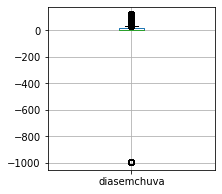

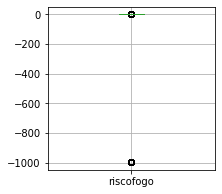

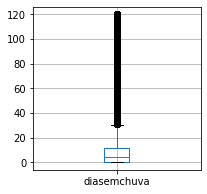

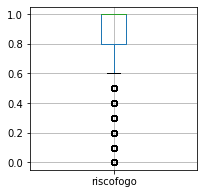

In [ ]:
# Tratando coluna de dias sem chuva e risco de fogo
fires1.boxplot('diasemchuva', figsize=(3,3)); plt.show()
fires1.boxplot('riscofogo', figsize=(3,3)); plt.show()

outlier_mask_rain = fires1['diasemchuva'] == -999
outlier_mask_fire = fires1['riscofogo'] == -999
fires1.loc[outlier_mask_rain,'diasemchuva'] = np.nan
fires1.loc[outlier_mask_fire,'riscofogo'] = np.nan

fires1.boxplot('diasemchuva', figsize=(3,3)); plt.show()
fires1.boxplot('riscofogo', figsize=(3,3)); plt.show()

In [ ]:
fires1.describe()

diasemchuva   precipitacao      riscofogo      latitude  \
count  554054.000000  557352.000000  552961.000000  1.212173e+06   
mean       11.192151       0.692832       0.825648 -1.005530e+01   
std        19.405084       3.184882       0.300880  5.751035e+00   
min         0.000000       0.000000       0.000000 -3.366100e+01   
25%         0.000000       0.000000       0.800000 -1.297100e+01   
50%         4.000000       0.000000       1.000000 -9.654000e+00   
75%        12.000000       0.100000       1.000000 -5.972100e+00   
max       120.000000     183.000000       1.000000  5.176100e+00   

          longitude           frp           ano           mes       dataord  
count  1.212173e+06  54426.000000  1.212173e+06  1.212173e+06  1.212173e+06  
mean  -5.096486e+01     18.423276  2.011484e+03  8.776560e+00  1.330867e+09  
std    6.858236e+00     53.680724  5.210471e+00  1.995952e+00  1.644454e+08  
min   -7.391000e+01      0.000000  1.998000e+03  1.000000e+00  8.967345e+08  
25%   -5.539000e+01      3.600000  2.007000e+03  8.000000e+00  1.190481e+09  
50%   -5.017760e+01      7.600000  2.013000e+03  9.000000e+00  1.376304e+09  
75%   -4.584130e+01     16.900000  2.016000e+03  1.000000e+01  1.470851e+09  
max   -3.480800e+01   6376.000000  2.018000e+03  1.200000e+01  1.546279e+09

In [ ]:
### Tranformando tipos de dados
fires1['estado'] = fires1['estado'].astype("category")
fires1['bioma'] = fires1['bioma'].astype("category")

In [ ]:
# Resultado
fires1.sample(1)

datahora    estado     bioma  diasemchuva  precipitacao  \
629772 2012-10-25 04:16:00  MARANHAO  Amazonia          NaN           NaN   

        riscofogo  latitude  longitude  frp   ano  mes       dataord  
629772        NaN   -3.7264   -46.1246  NaN  2012   10  1.351139e+09

## 1.3. Lendo dataset Incêndios Florestais


Dados tratados:
https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

Disponível na íntegra em:
https://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif/resource/949310f1-05bc-4f56-a63f-aef67aac6164


In [ ]:
# Lendo segundo dataset
fires2 = pd.read_csv(os.path.join(path,"amazon.csv"), encoding='cp1252')
fires2.columns = ['ano', 'estado', 'mes', 'numero','data']

# Amostra do dataset Incêndios Florestais
print("Número de linhas:", len(fires2.index))
fires2.sample(3)

Número de linhas: 6454


ano          estado       mes   numero        data
128   2006            Acre     Julho   33.000  2006-01-01
5668  2008  Santa Catarina  Setembro  233.000  2008-01-01
3240  2010            Pará     Julho    1.432  2010-01-01

In [ ]:
fires2.describe()

ano       numero
count  6454.000000  6454.000000
mean   2007.461729   108.293163
std       5.746654   190.812242
min    1998.000000     0.000000
25%    2002.000000     3.000000
50%    2007.000000    24.000000
75%    2012.000000   113.000000
max    2017.000000   998.000000

In [ ]:
fires2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ano     6454 non-null   int64  
 1   estado  6454 non-null   object 
 2   mes     6454 non-null   object 
 3   numero  6454 non-null   float64
 4   data    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
### Alterando coluna de meses
fires2['mes'].value_counts()

Janeiro      541
Abril        540
Setembro     540
Julho        540
Março        540
Novembro     540
Fevereiro    540
Outubro      540
Agosto       540
Maio         540
Junho        540
Dezembro     513
Name: mes, dtype: int64

In [ ]:
# Criando coluna de datas no dataset1
mapping = {
'Janeiro'  : 1,
'Fevereiro': 2,
'Março'    : 3,
'Abril'    : 4,
'Maio'     : 5,
'Junho'    : 6,
'Julho'    : 7,
'Agosto'   : 8,
'Setembro' : 9,
'Outubro'  : 10,
'Novembro' : 11,
'Dezembro' : 12,
}

print(fires2['mes'].head(1))
fires2['mes'] = fires2['mes'].apply(lambda x: mapping[x])
fires2['mes'] = fires2['mes'].astype("int64")
print(fires2['mes'].head(1))

0    Janeiro
Name: mes, dtype: object
0    1
Name: mes, dtype: int64


In [ ]:
### Transformações em estado
# Estado em caixa alta
fires2['estado'] = fires2['estado'].apply(lambda x: x.upper())

# Corrigindo alguns labels de estados
fires2['estado'] = fires2['estado'].apply(lambda x: 'PARA' if x == 'PARÁ' else x)
fires2['estado'] = fires2['estado'].apply(lambda x: 'RIO DE JANEIRO' if x == 'RIO' else x)
fires2['estado'] = fires2['estado'].apply(lambda x: 'PIAUI' if x == 'PIAU' else x)

# Dado categórico
fires2['estado'] = fires2['estado'].astype("category")

In [ ]:
# Resultado
fires2.sample(1)

ano   estado  mes  numero        data
3534  2005  PARAIBA   10   155.0  2005-01-01

## 1.4. Unindo datasets

In [ ]:
# Agrupando focos no dataset BDqueimadas 
fires1_focos = fires1[['estado', 'ano', 'mes']].copy()
fires1_focos['focos'] = fires1_focos['ano'].apply(lambda x : 1)
fires1_focos = fires1_focos.groupby(['estado', 'ano', 'mes']).agg({'focos': 'sum'})
fires1_focos.reset_index(inplace=True)

fires1_focos.sample(1)

estado   ano  mes  focos
426  ALAGOAS  2012    7      1

In [ ]:
# Unindo ao dataset de Incêndios
print("fires2 nrows:", len(fires2.index))
print("fires1_focos nrows:", len(fires1_focos.index))

df_sum = pd.merge(fires2, fires1_focos, how="outer", on=['estado','ano','mes'])

print("df_sum nrows:", len(df_sum.index))
df_sum.sample(1)

fires2 nrows: 6454
fires1_focos nrows: 6804
df_sum nrows: 7761


ano       estado  mes  numero        data  focos
2687  2006  MATO GROSSO    8   6.218  2006-01-01   1764

In [ ]:
# Transformações de data
from pandas.api.types import CategoricalDtype

dates = pd.date_range(start='1997-12-01', end='2019-01-01', freq=pd.offsets.MonthEnd(1))
dates = pd.Series(dates)
dates = dates.apply(lambda x : str(x)[:-12])

date_type = CategoricalDtype(categories=dates, ordered=True)

df_sum['data'] = df_sum['ano'].apply(str)+df_sum['mes'].apply(lambda x : "-{:2.0f}".format(x).replace(" ", "0"))
df_sum['data'] = df_sum['data'].astype(date_type)
df_sum.sample(1)

ano estado  mes  numero     data  focos
1350  2012  CEARA    8   278.0  2012-08    133

In [ ]:
# Setando nome do dataset principal e deletando os outros
df = fires1
del fires1
del fires2

In [ ]:
# Salvando dataset
df.to_pickle("df.pkl")

# Importando dataset
#import pandas as pd
#df = pd.read_pickle("df.pkl")
#df[df['diasemchuva'] == -999]['diasemchuva'] = np.nan

# 2. Análise Exploratória

## 2.1. Visualização geral com SweetViz

In [ ]:
%%capture
!pip install sweetviz
!pip install tdqm

import warnings
warnings.simplefilter(action="ignore")

import sweetviz as sv # ferramenta de análise exploratória

import pandas as pd # carregamento e manipulação de dados
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import numpy as np # processamento matemático
from scipy.stats import norm # normal

                                             |          | [  0%]   00:00 -> (? left)


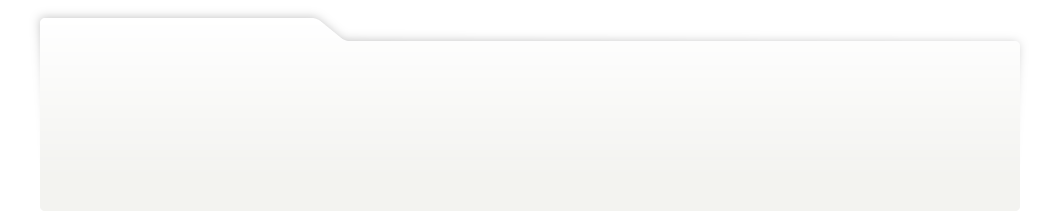
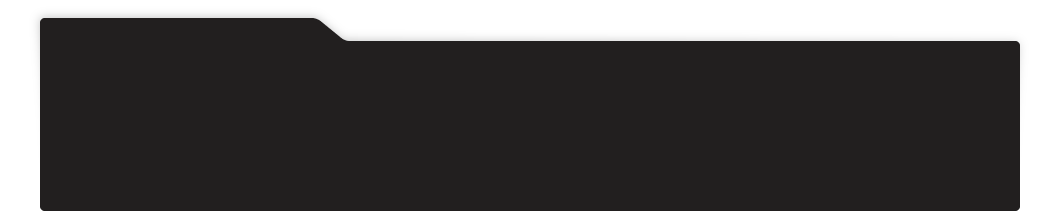
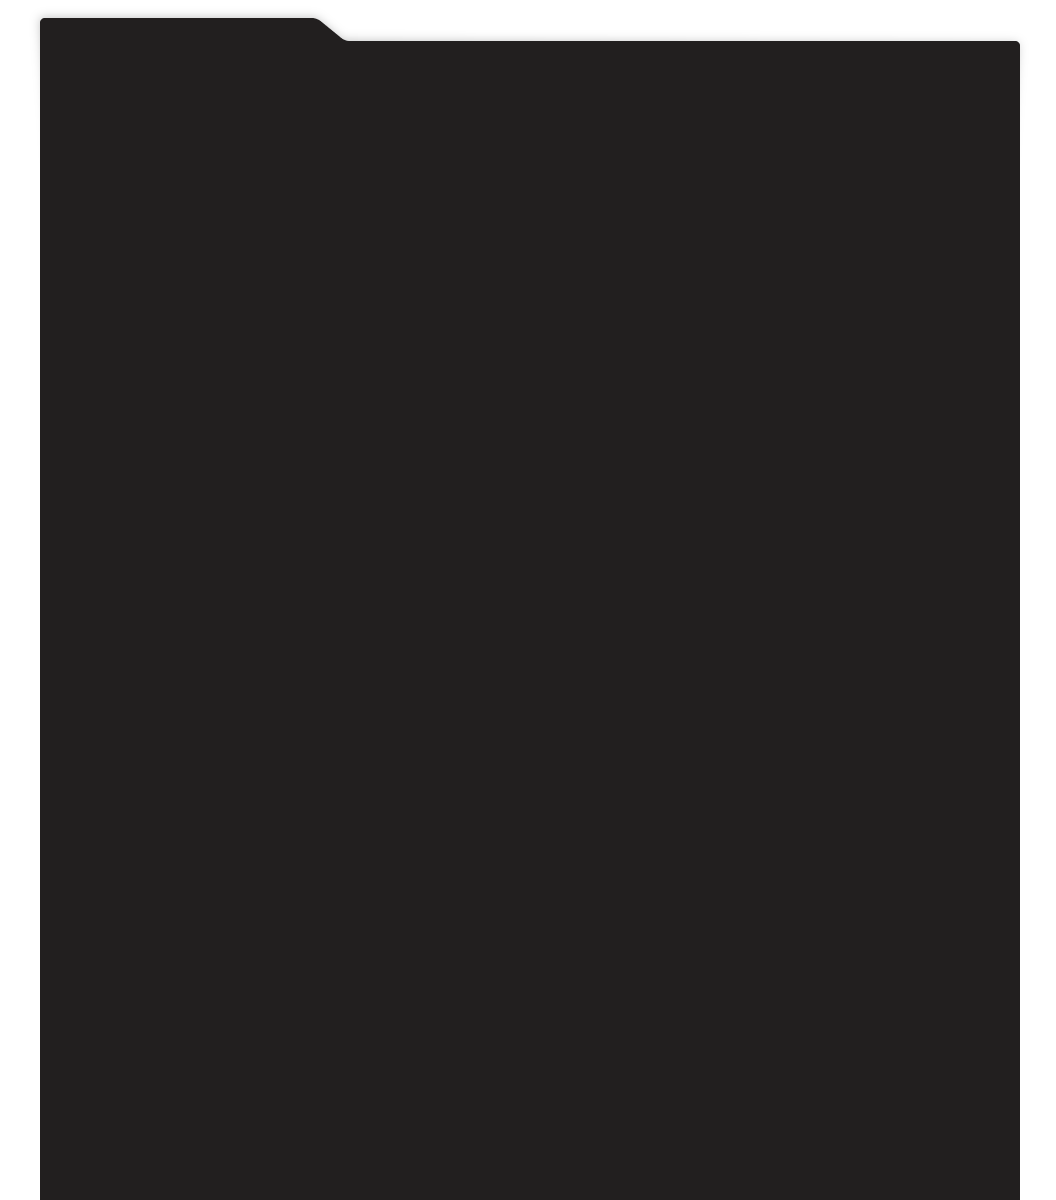
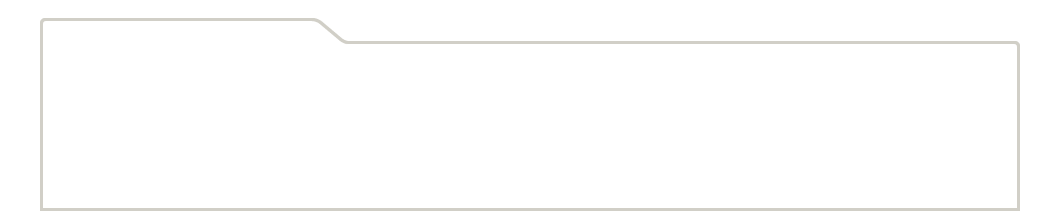
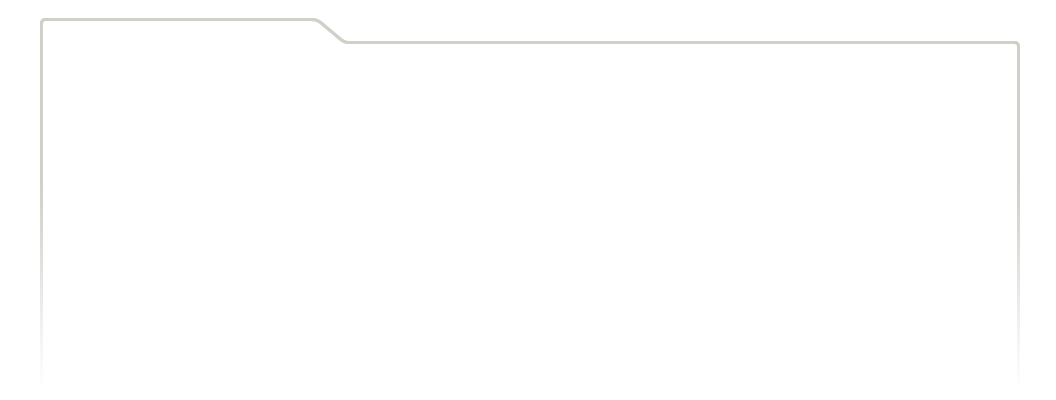
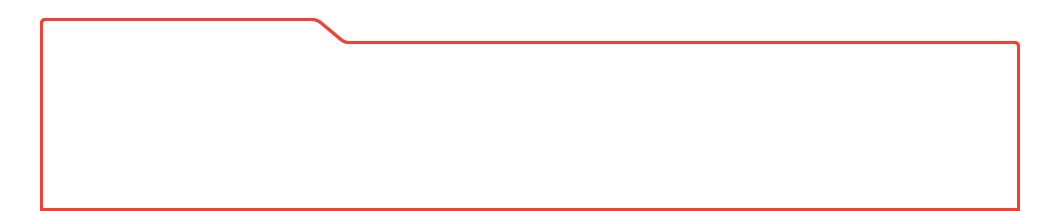
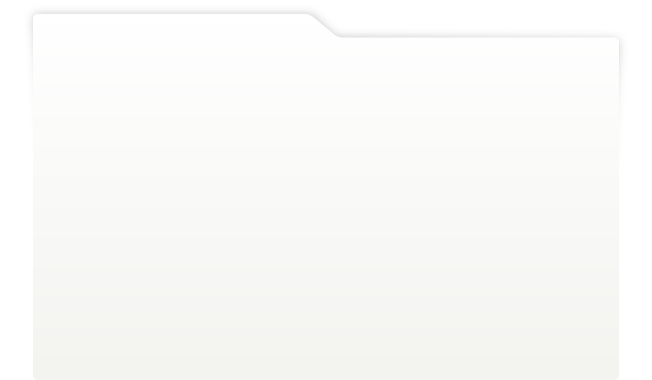
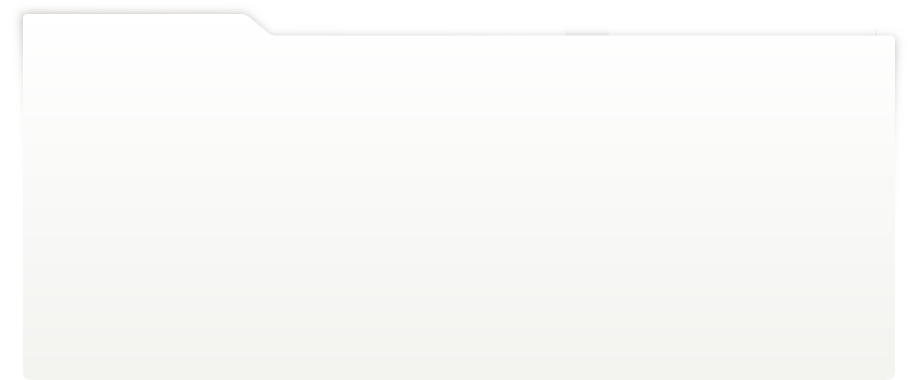
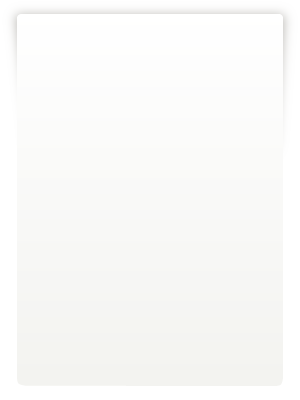
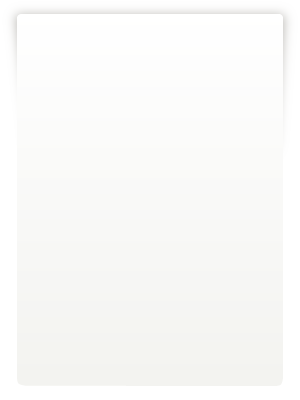
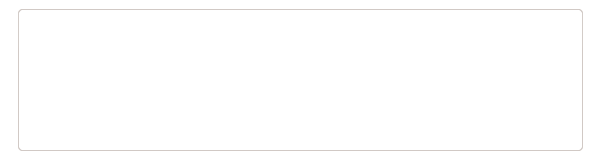
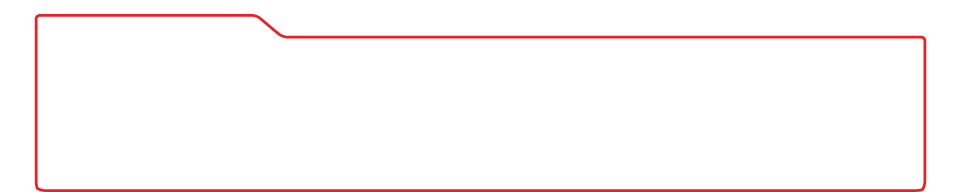
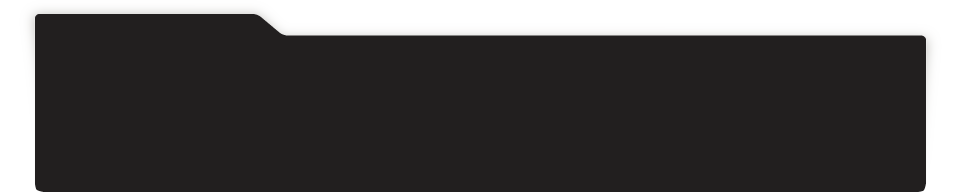
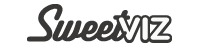
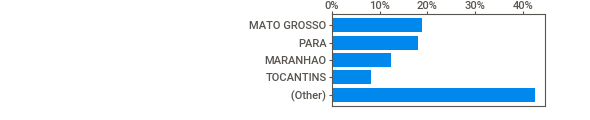
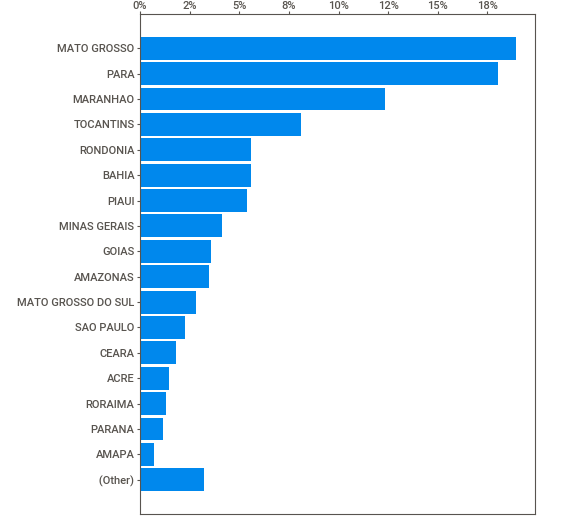
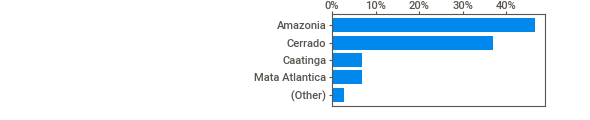
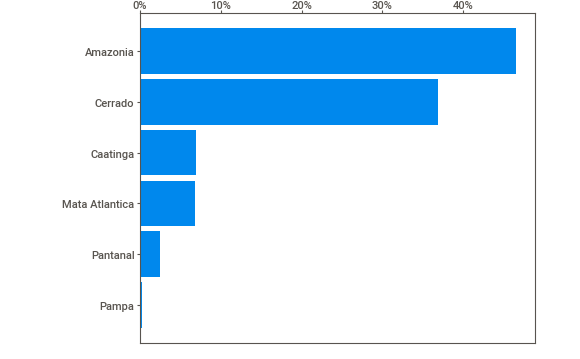
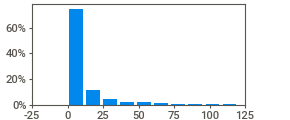
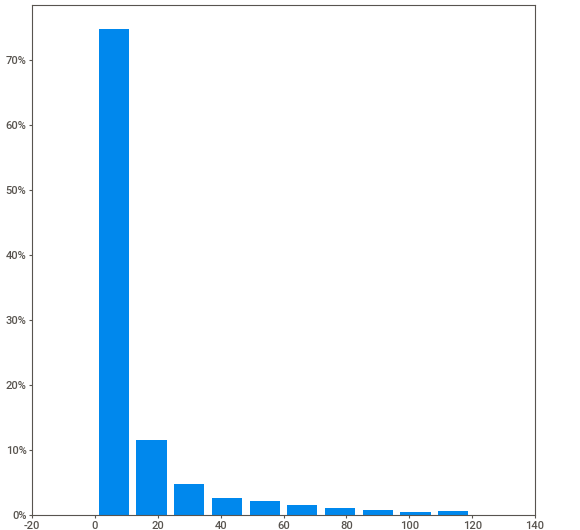
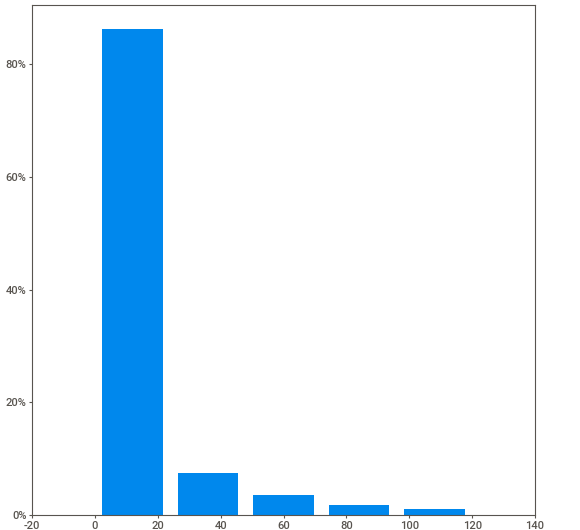
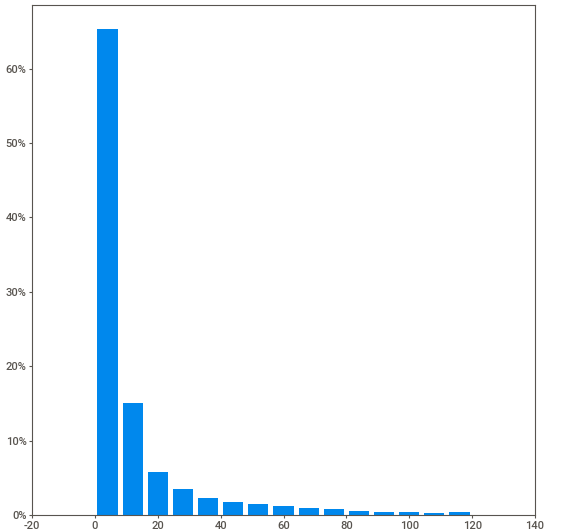
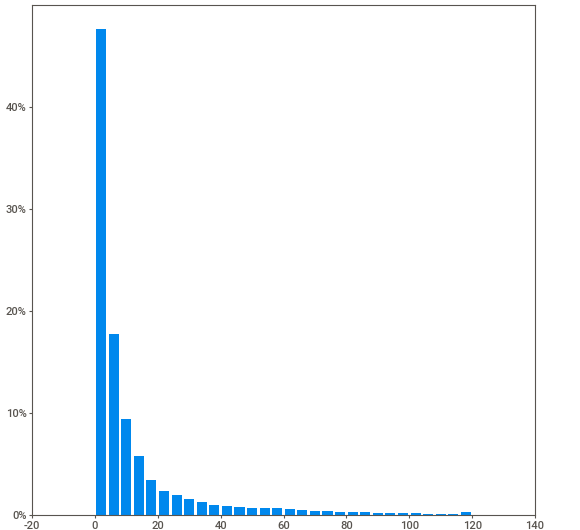
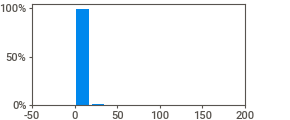
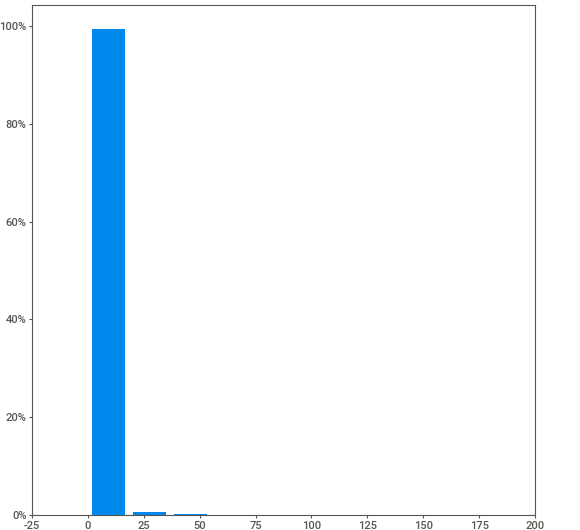
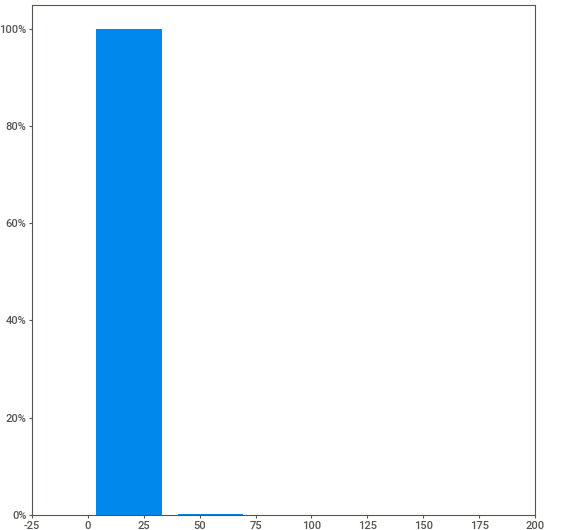
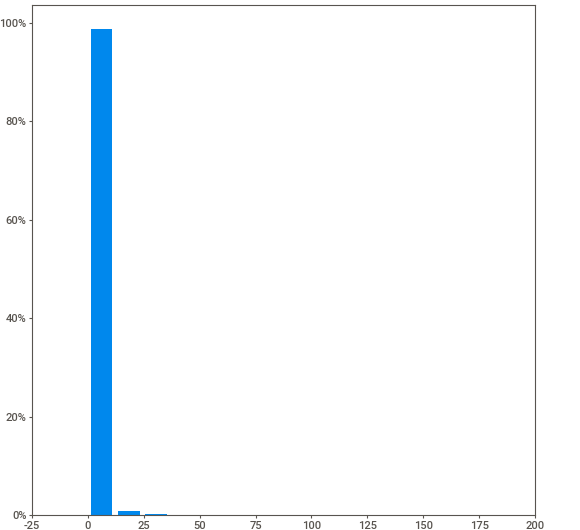
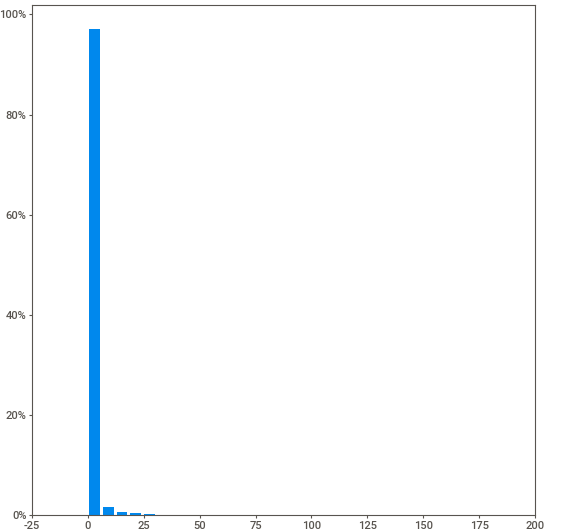
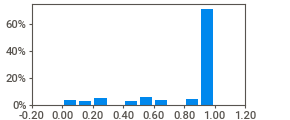
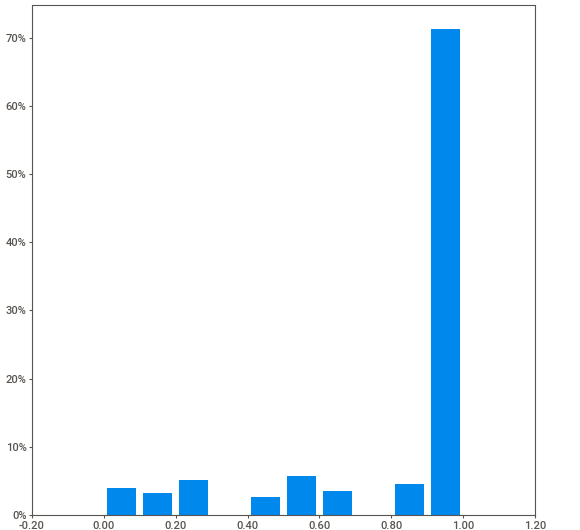
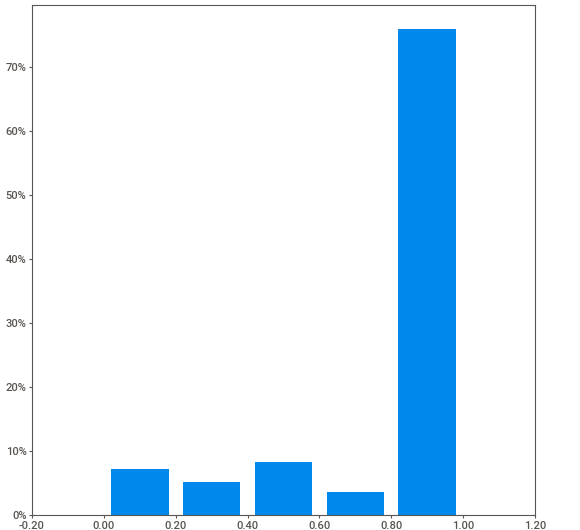
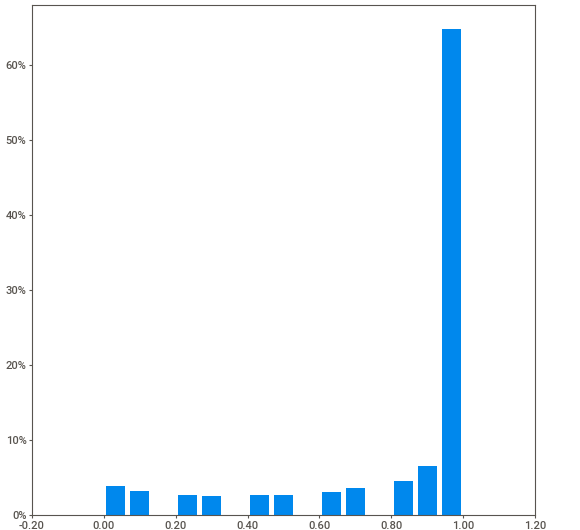
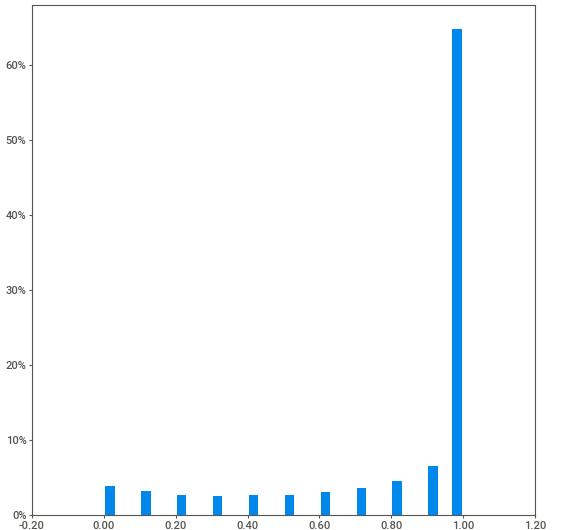
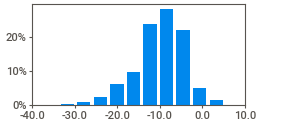
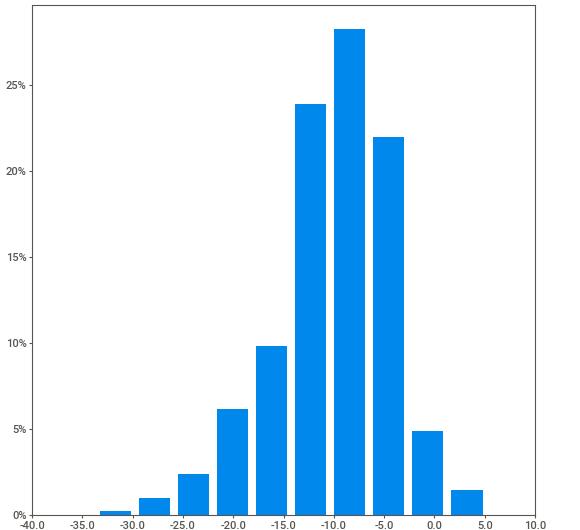
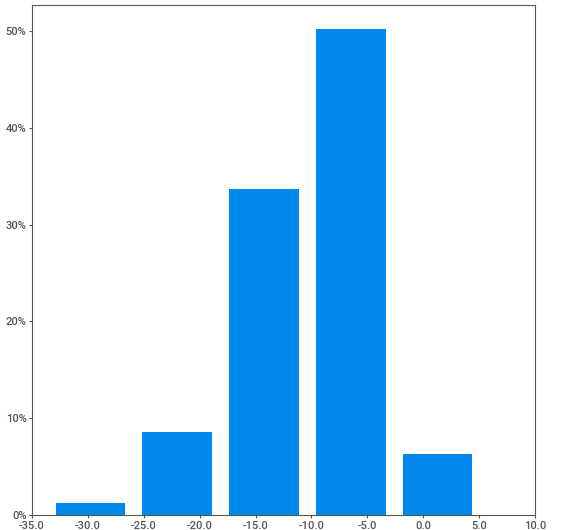
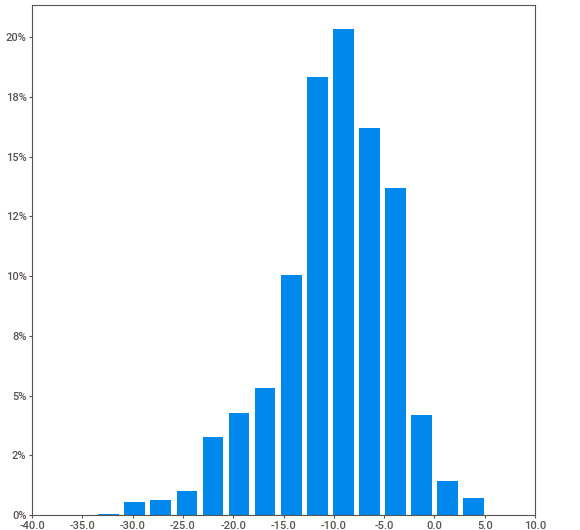
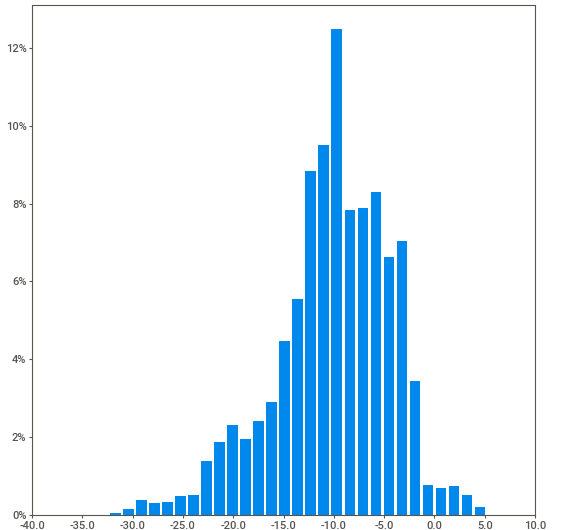
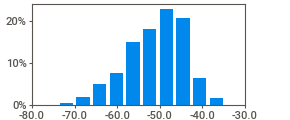
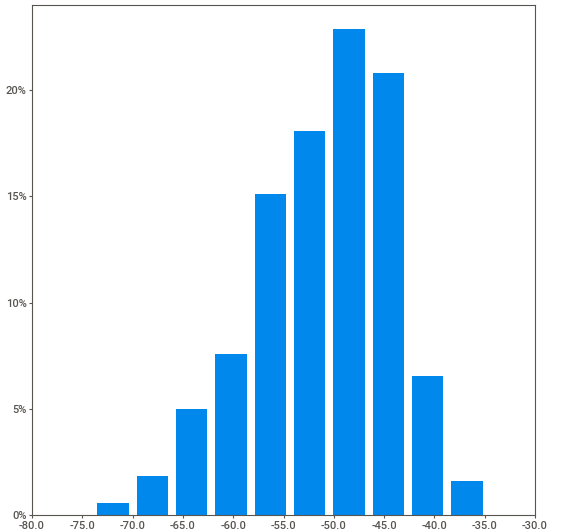
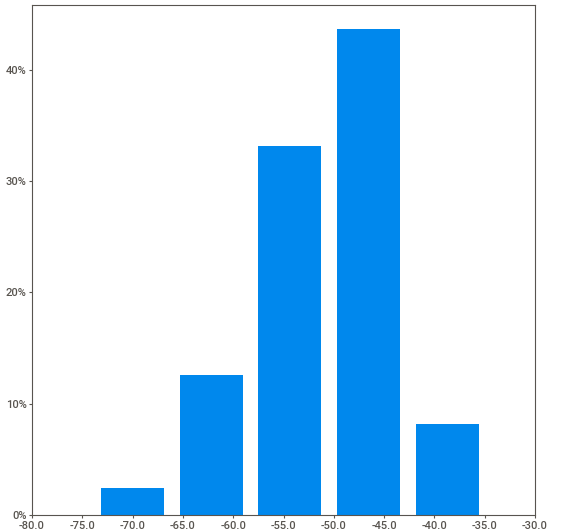
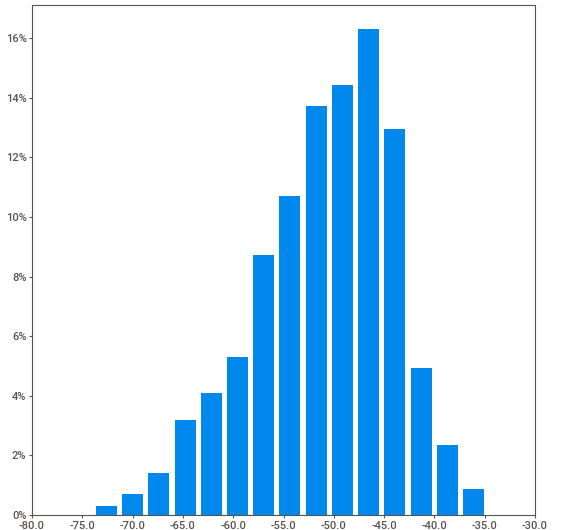
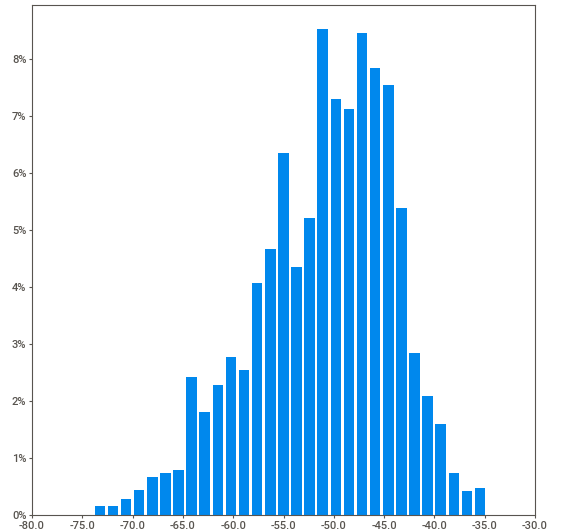
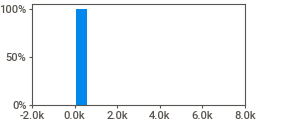
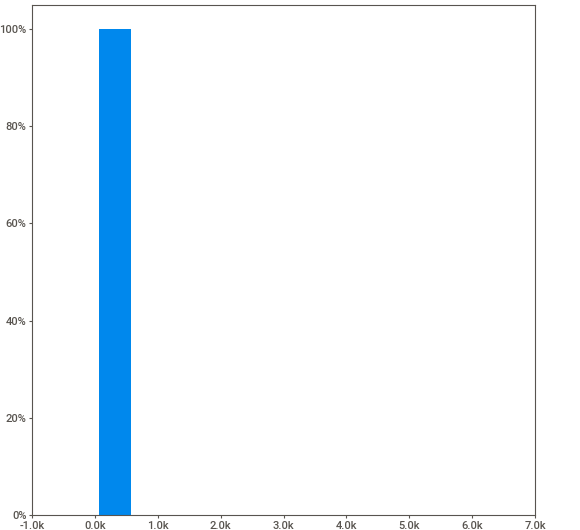
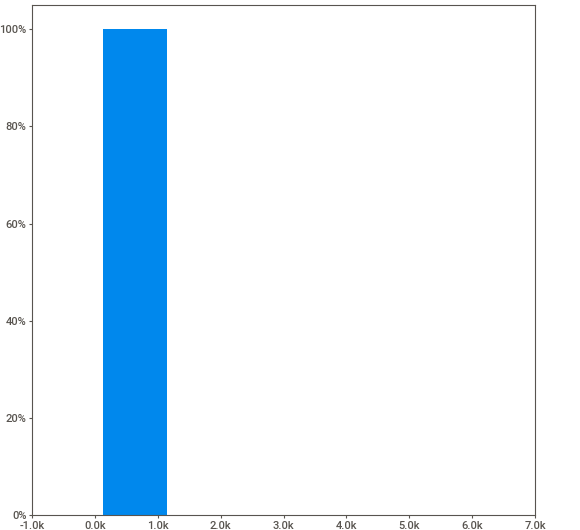
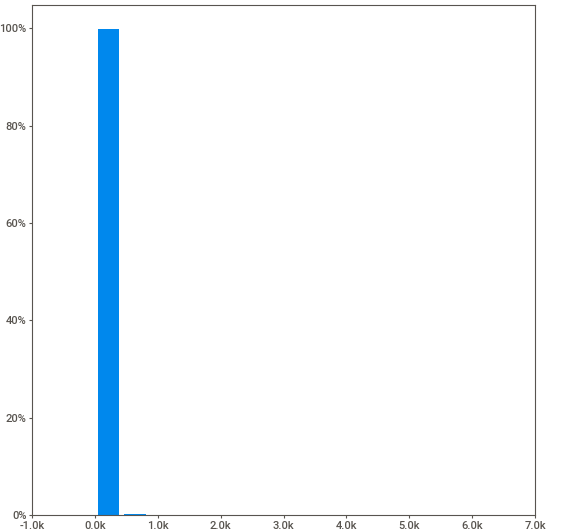
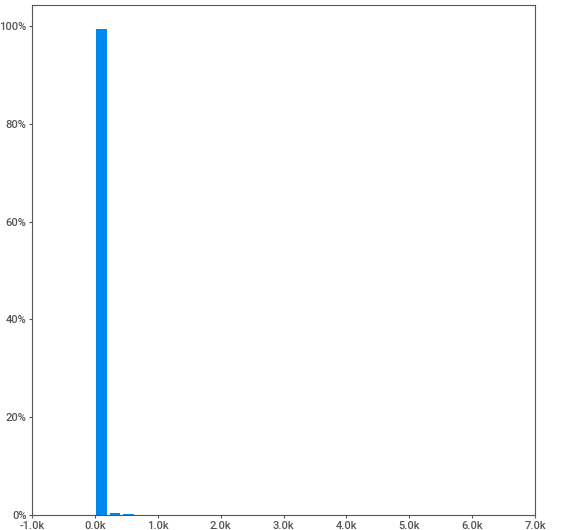
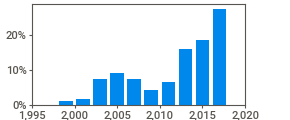
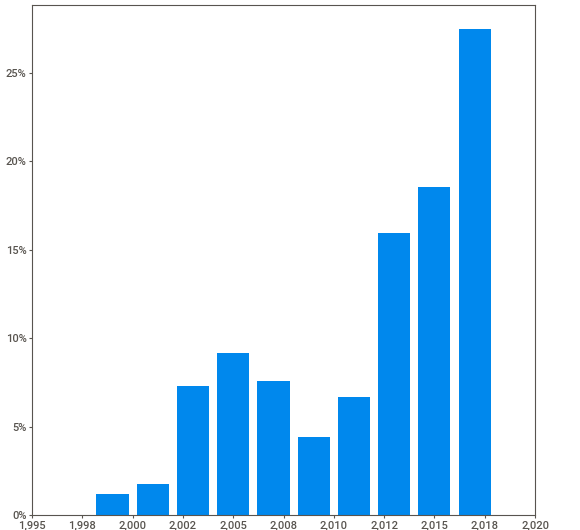
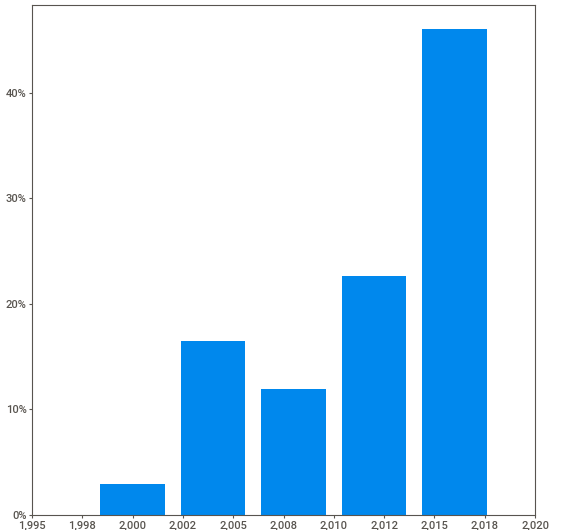
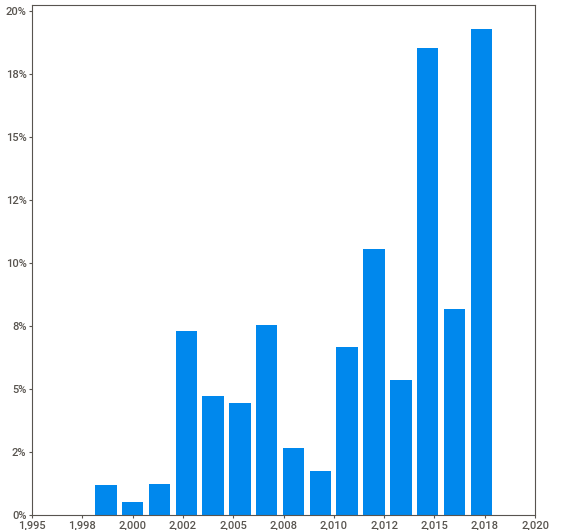
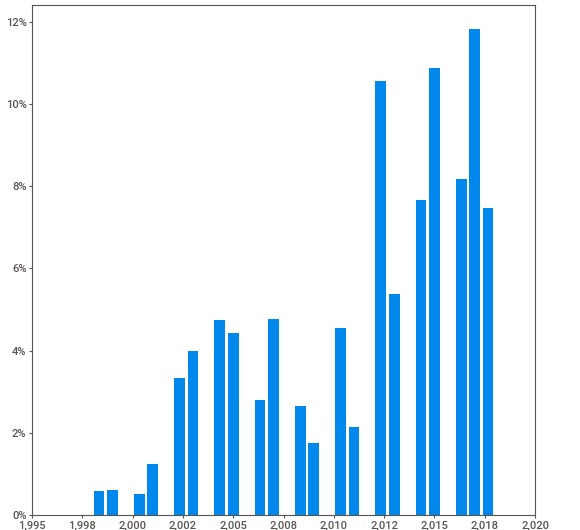
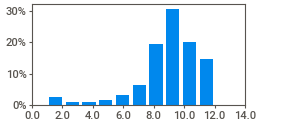
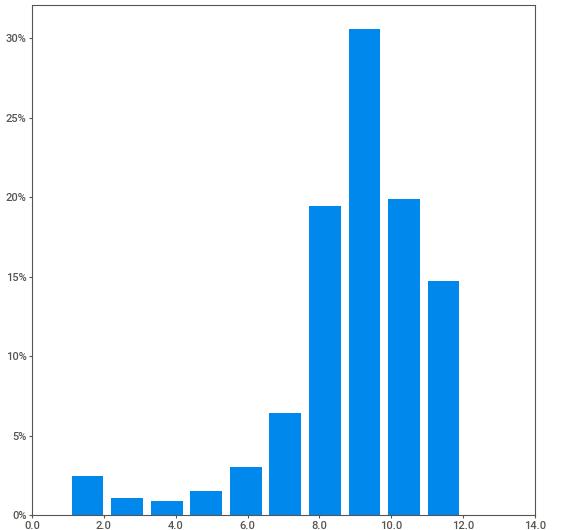
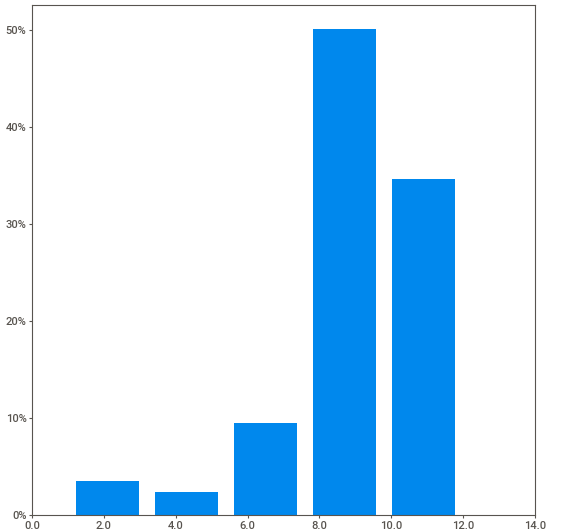
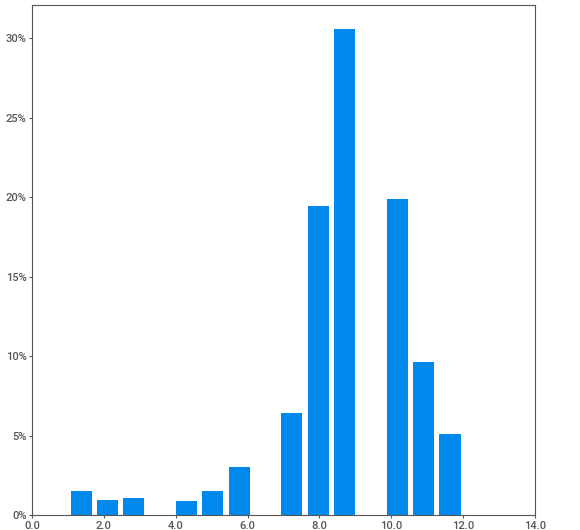
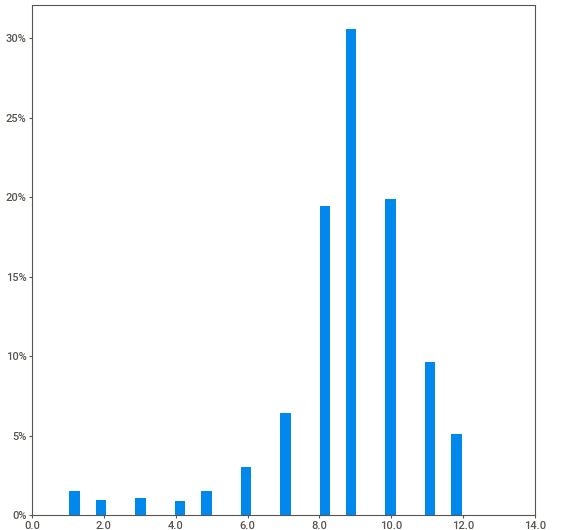
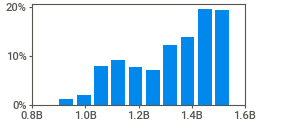
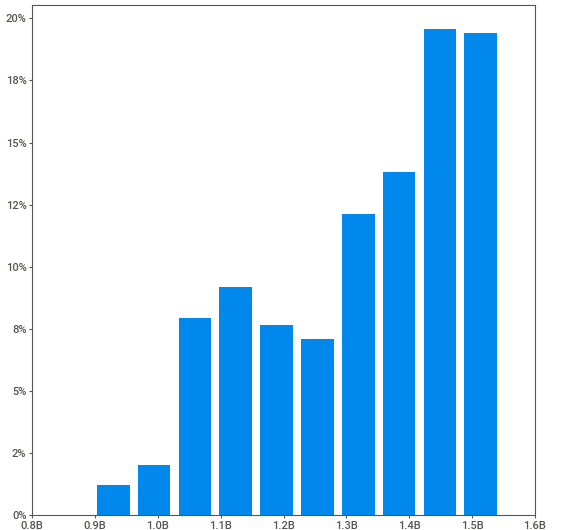
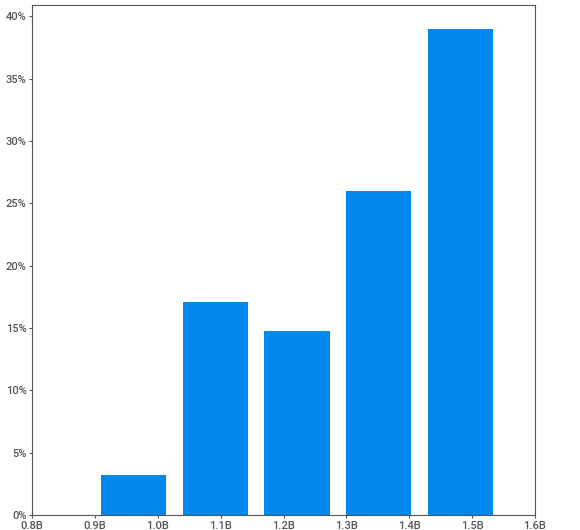
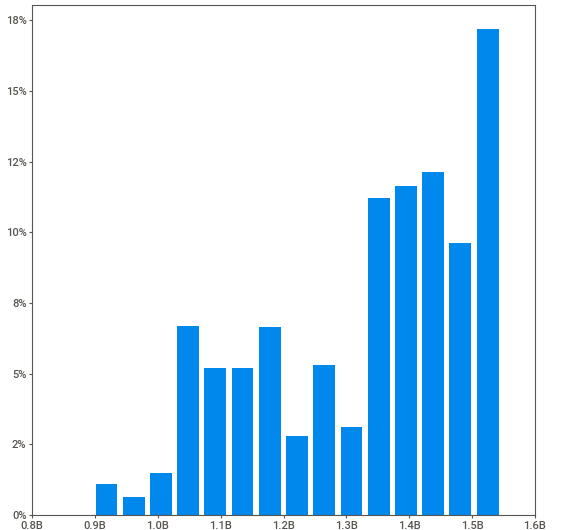
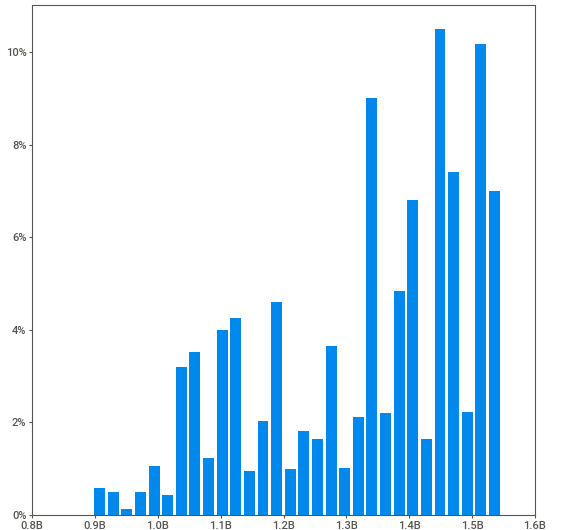
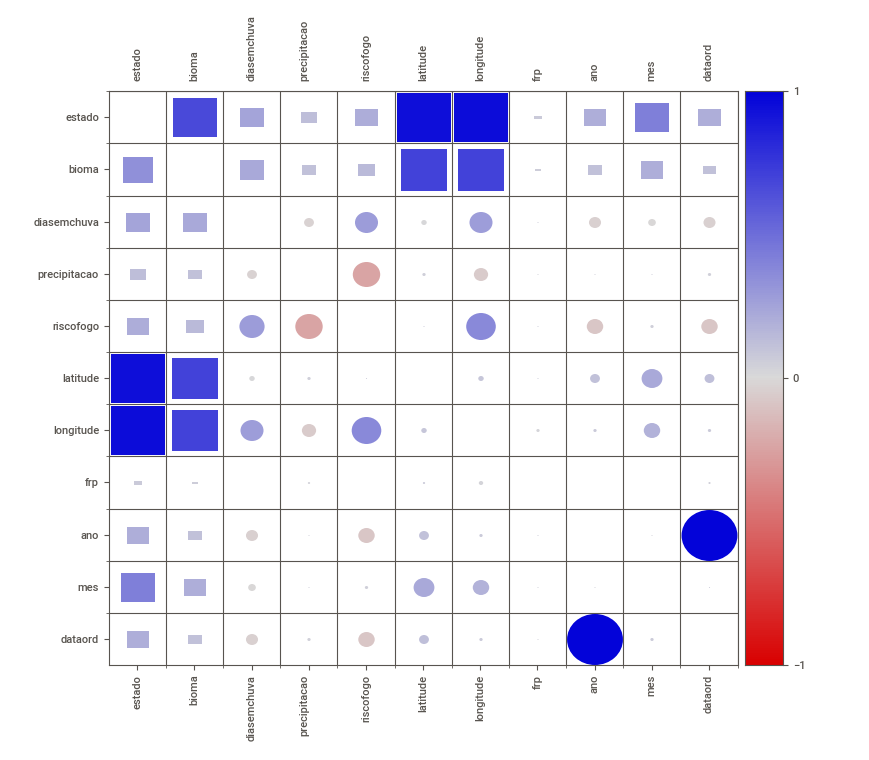
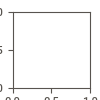

In [ ]:
report = sv.analyze(df)
report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


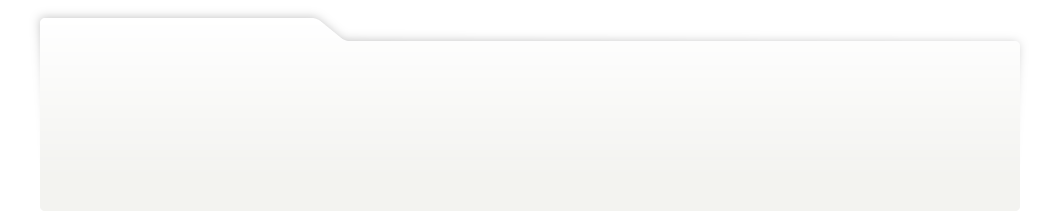
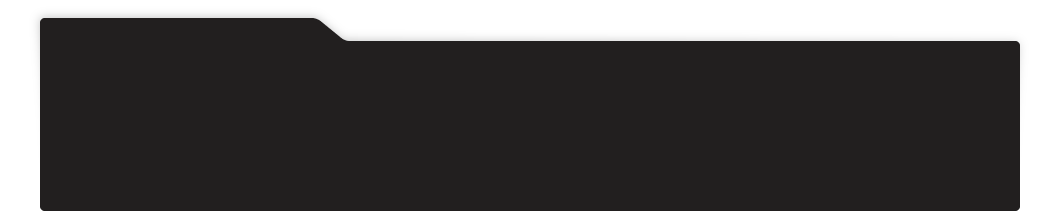
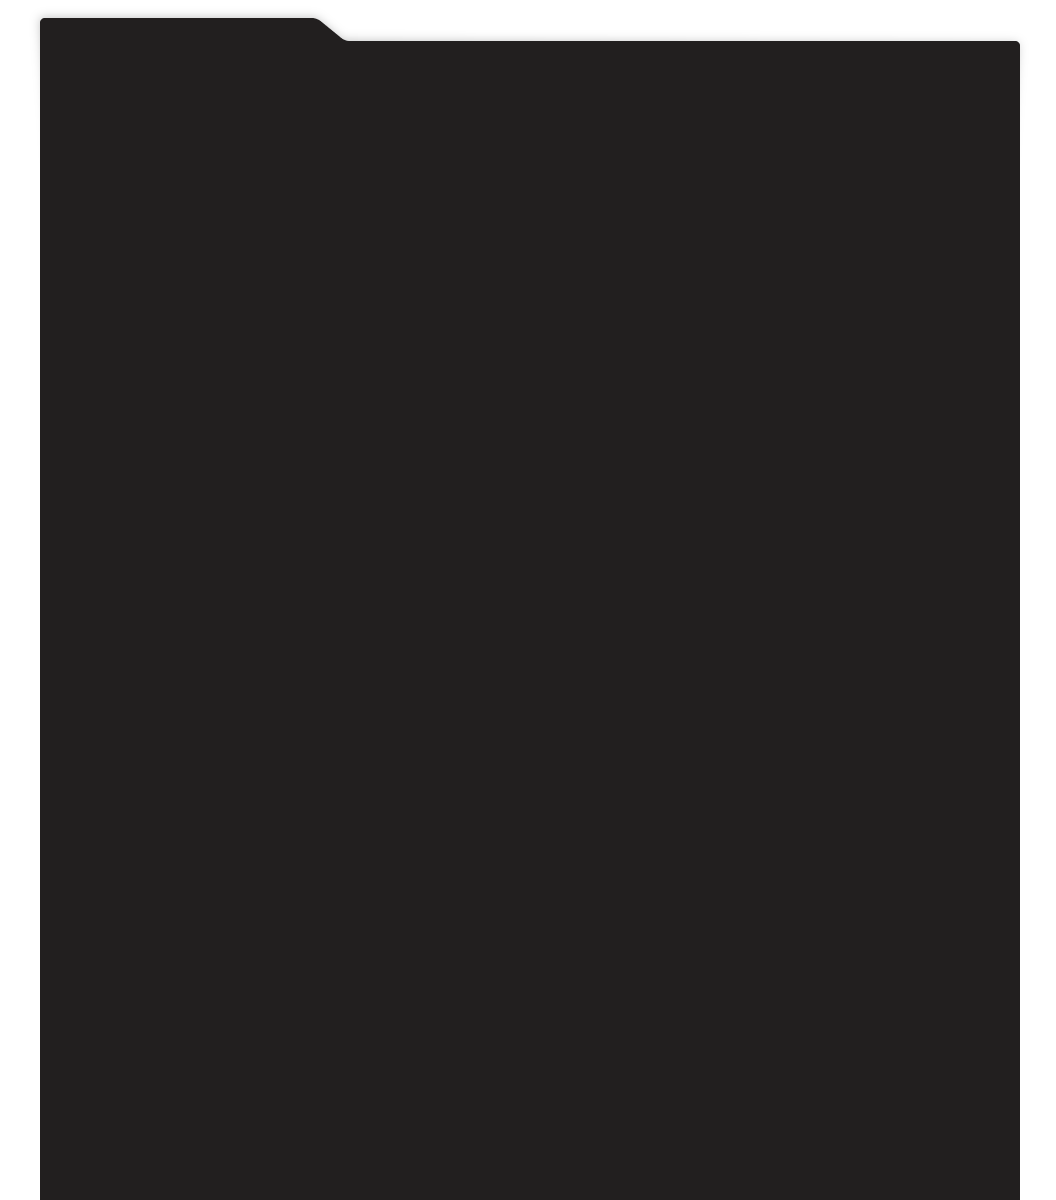
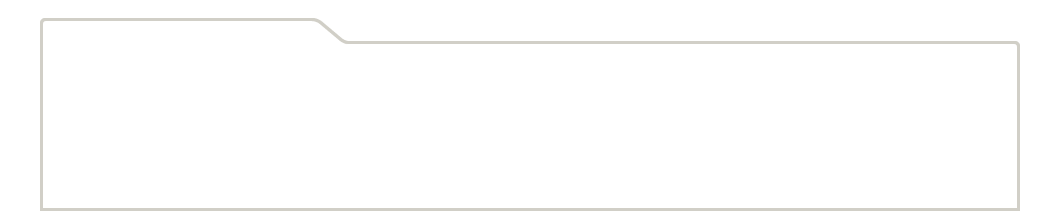
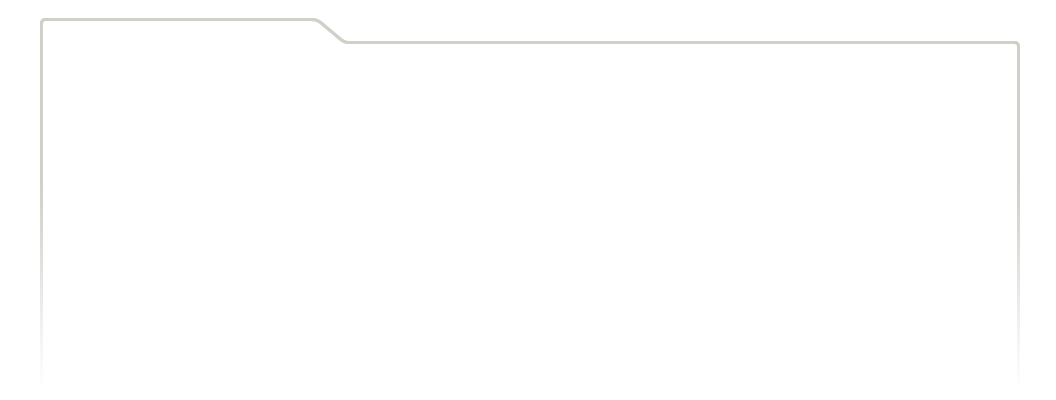
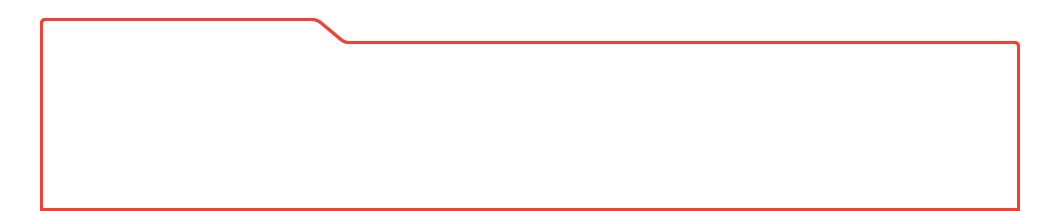
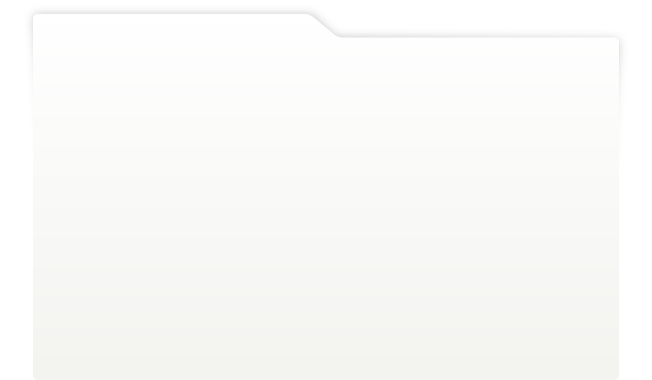
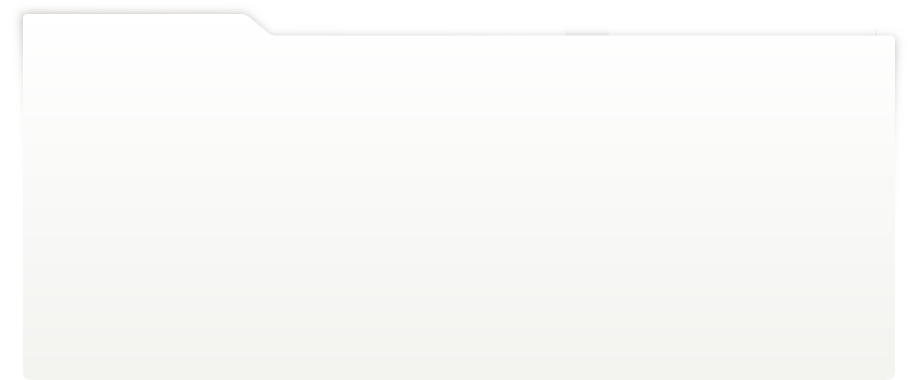
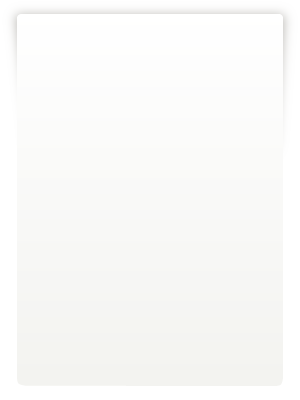
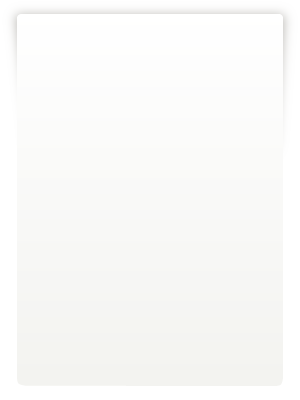
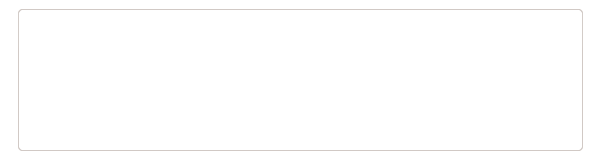
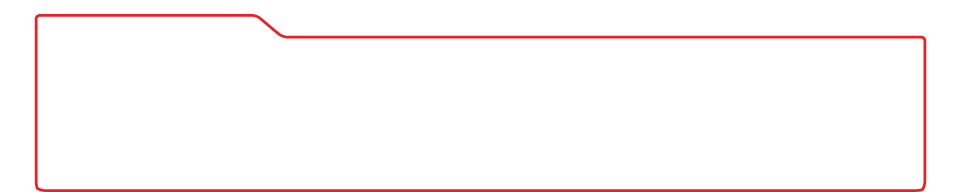
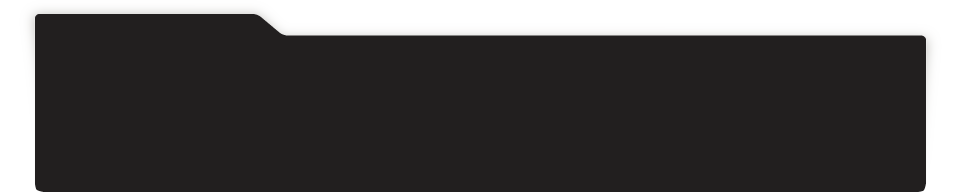
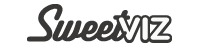
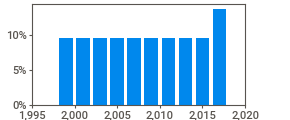
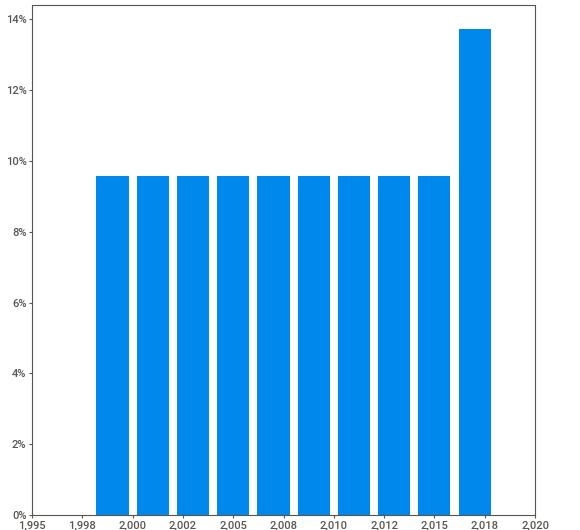
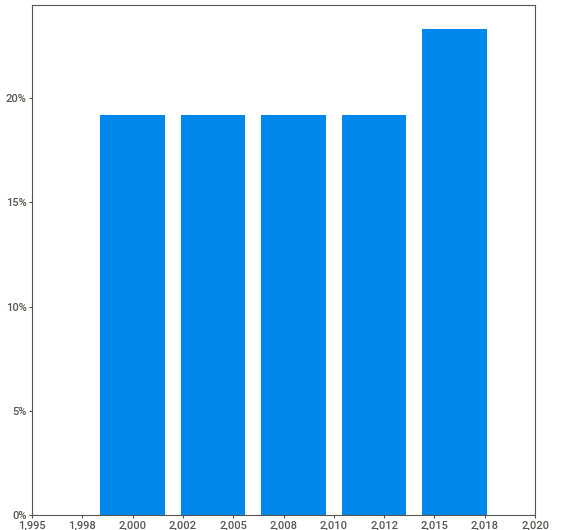
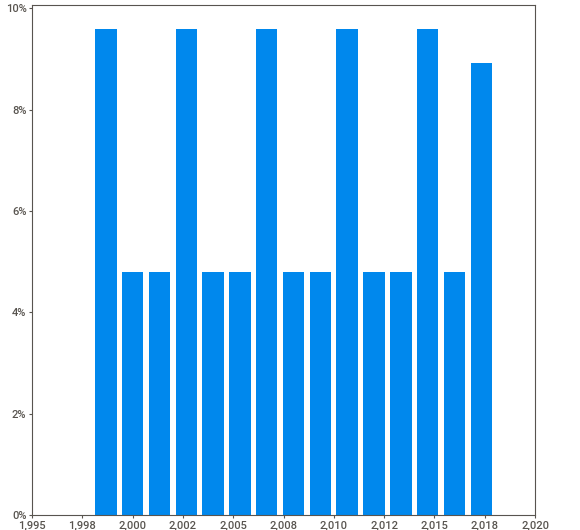
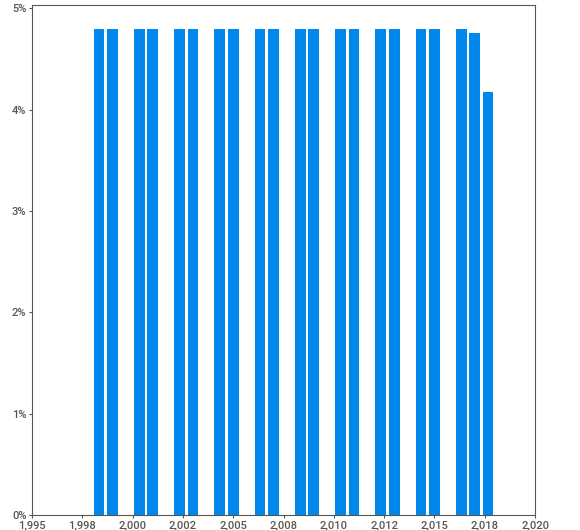
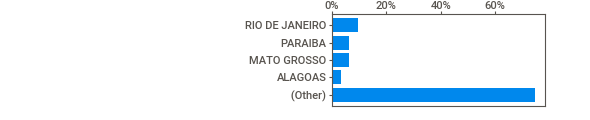
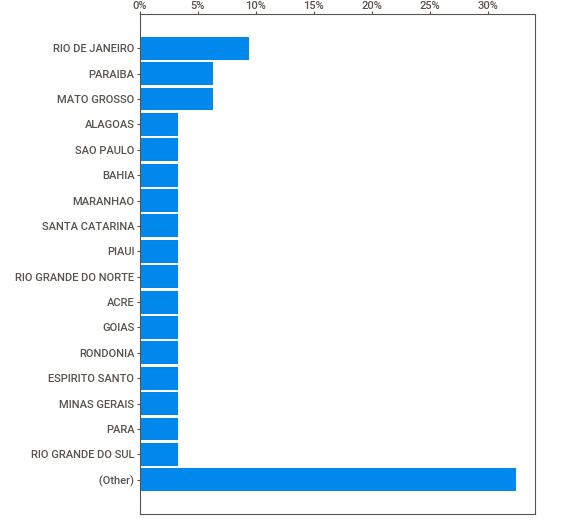
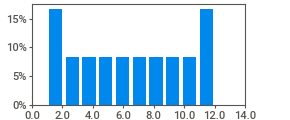
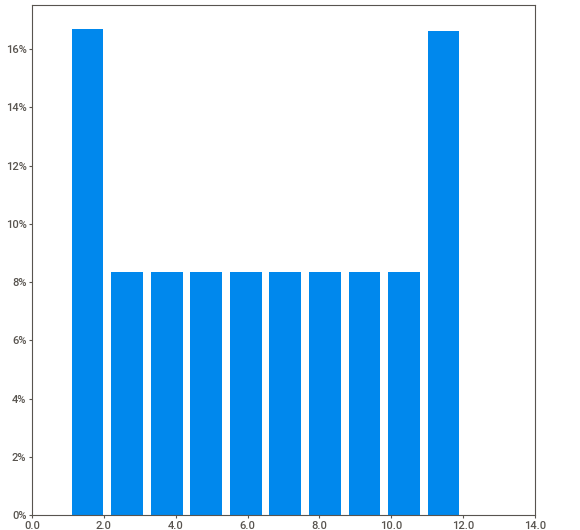
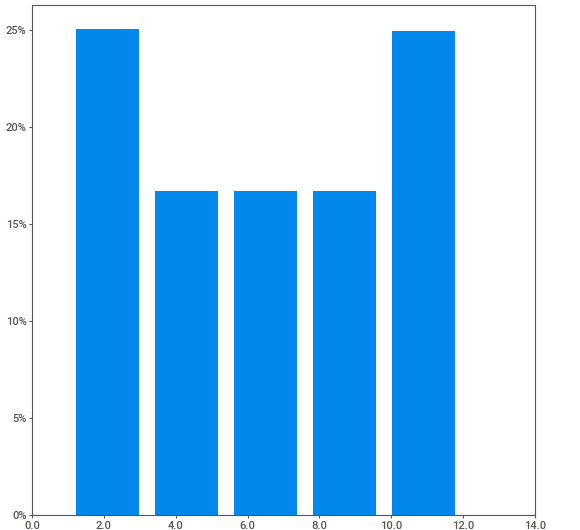
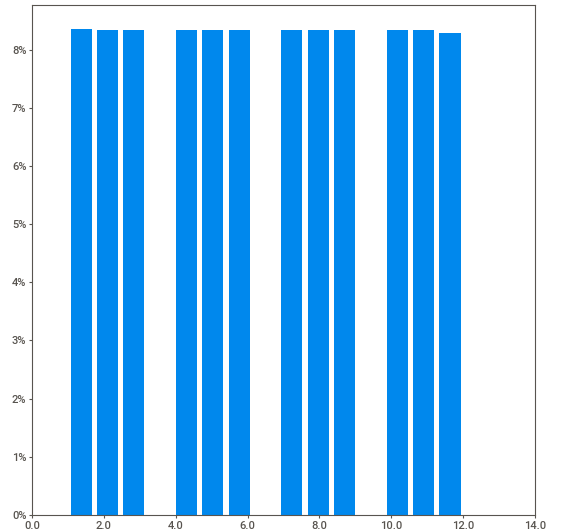
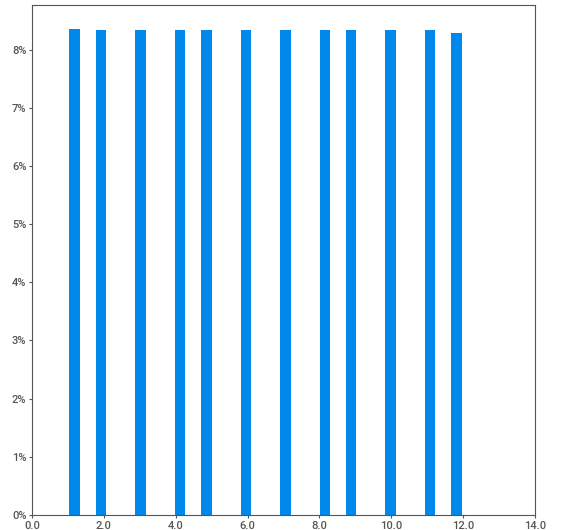
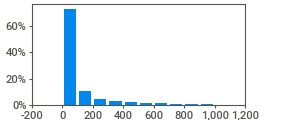
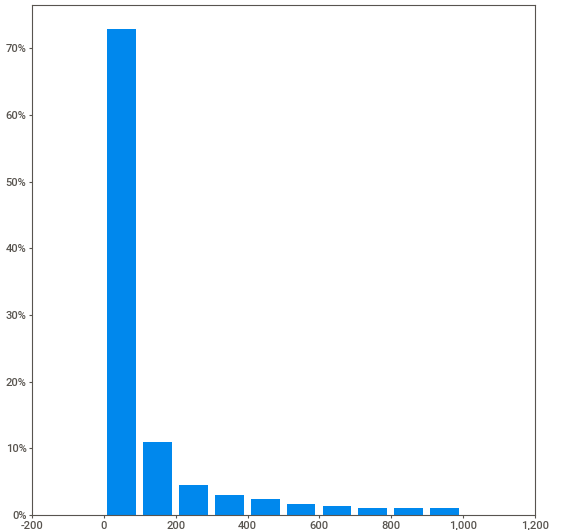
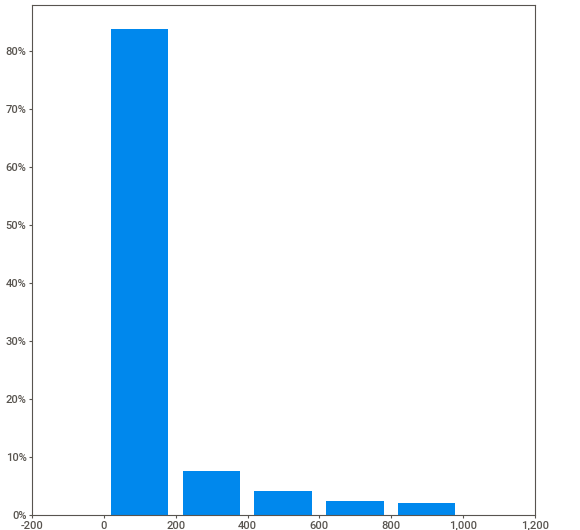
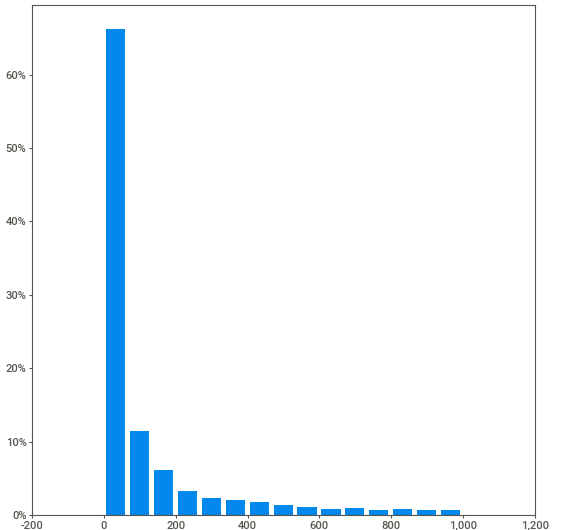
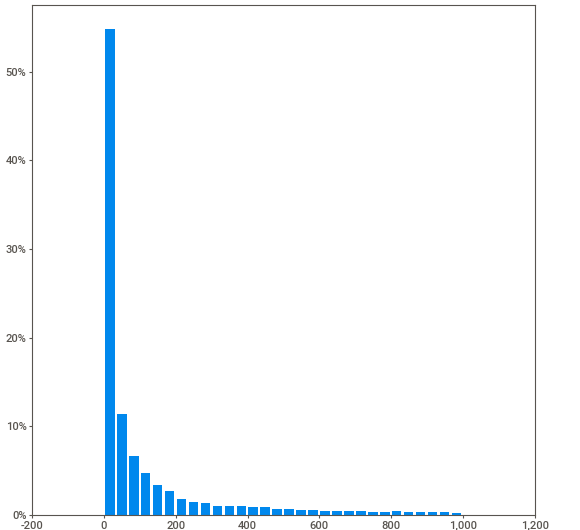
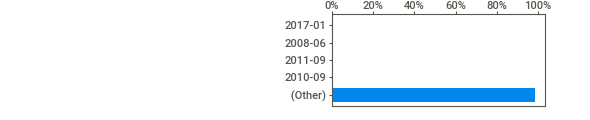
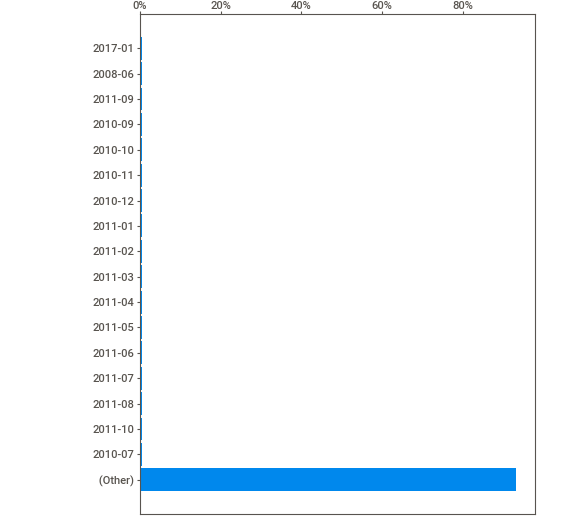
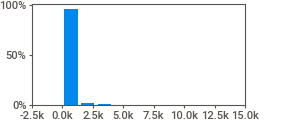
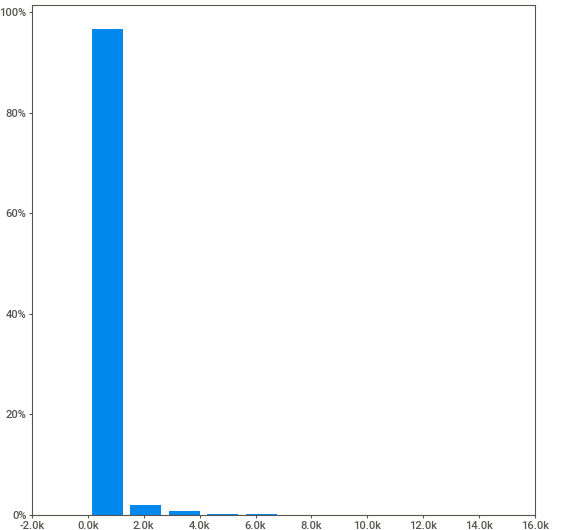
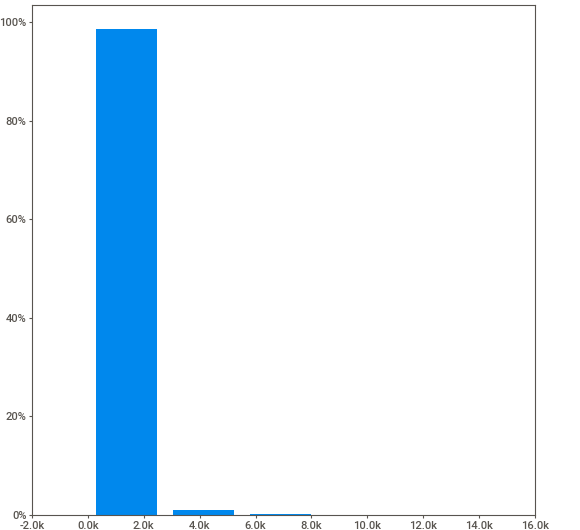
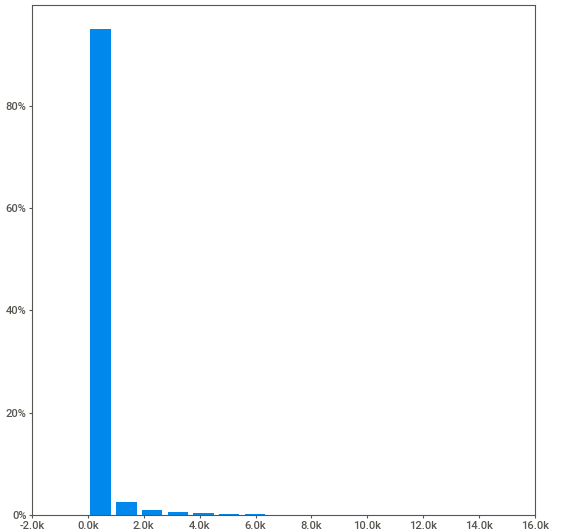
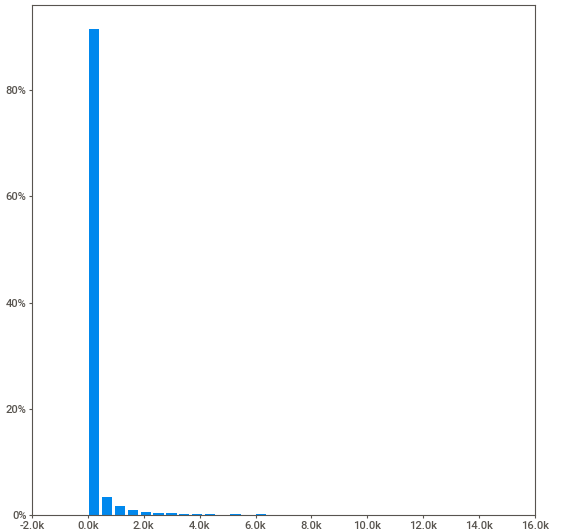
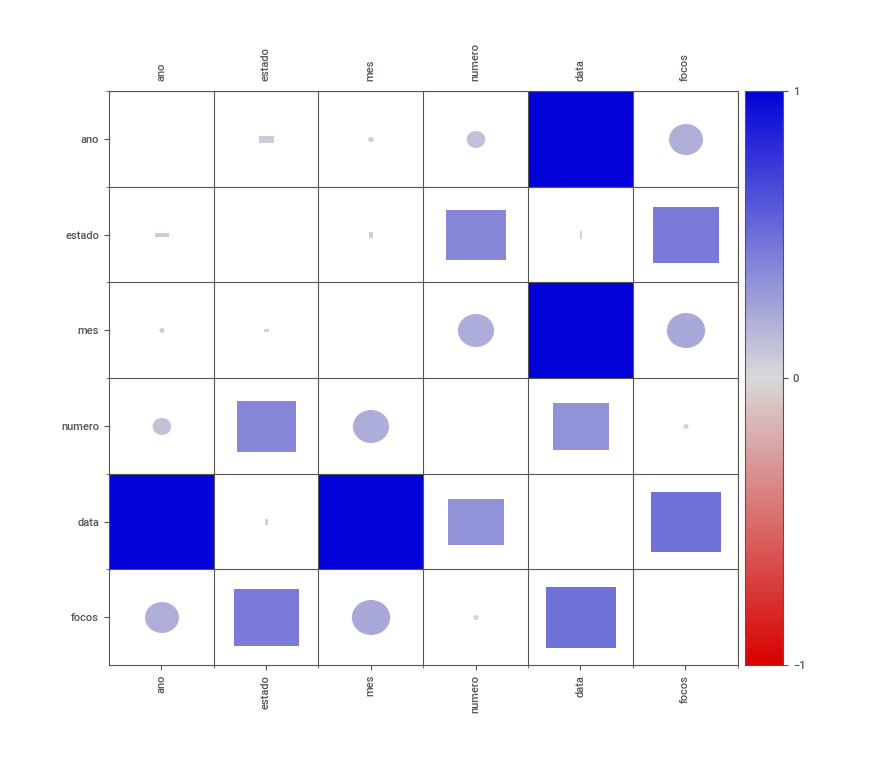
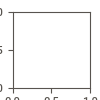

In [ ]:
report = sv.analyze(df_sum)
report.show_notebook()

In [ ]:
del report

## 2.2. Características do Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212173 entries, 0 to 1212172
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   datahora      1212173 non-null  datetime64[ns]
 1   estado        1212173 non-null  category      
 2   bioma         1212092 non-null  category      
 3   diasemchuva   554054 non-null   float64       
 4   precipitacao  557352 non-null   float64       
 5   riscofogo     552961 non-null   float64       
 6   latitude      1212173 non-null  float64       
 7   longitude     1212173 non-null  float64       
 8   frp           54426 non-null    float64       
 9   ano           1212173 non-null  int64         
 10  mes           1212173 non-null  int64         
 11  dataord       1212173 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(7), int64(2)
memory usage: 94.8 MB


In [ ]:
df.describe()

diasemchuva   precipitacao      riscofogo      latitude  \
count  554054.000000  557352.000000  552961.000000  1.212173e+06   
mean       11.192151       0.692832       0.825648 -1.005530e+01   
std        19.405084       3.184882       0.300880  5.751035e+00   
min         0.000000       0.000000       0.000000 -3.366100e+01   
25%         0.000000       0.000000       0.800000 -1.297100e+01   
50%         4.000000       0.000000       1.000000 -9.654000e+00   
75%        12.000000       0.100000       1.000000 -5.972100e+00   
max       120.000000     183.000000       1.000000  5.176100e+00   

          longitude           frp           ano           mes       dataord  
count  1.212173e+06  54426.000000  1.212173e+06  1.212173e+06  1.212173e+06  
mean  -5.096486e+01     18.423276  2.011484e+03  8.776560e+00  1.330867e+09  
std    6.858236e+00     53.680724  5.210471e+00  1.995952e+00  1.644454e+08  
min   -7.391000e+01      0.000000  1.998000e+03  1.000000e+00  8.967345e+08  
25%   -5.539000e+01      3.600000  2.007000e+03  8.000000e+00  1.190481e+09  
50%   -5.017760e+01      7.600000  2.013000e+03  9.000000e+00  1.376304e+09  
75%   -4.584130e+01     16.900000  2.016000e+03  1.000000e+01  1.470851e+09  
max   -3.480800e+01   6376.000000  2.018000e+03  1.200000e+01  1.546279e+09

In [ ]:
df.head()

datahora   estado           bioma  diasemchuva  precipitacao  \
0 2018-09-19 16:48:00    PIAUI         Cerrado          2.0           0.0   
1 2018-12-28 17:12:00     PARA        Amazonia          0.0           2.6   
2 2018-11-29 21:34:24  ALAGOAS  Mata Atlantica          2.0           0.0   
3 2018-11-18 17:00:00     PARA        Amazonia          2.0           0.0   
4 2018-10-08 20:04:40    PIAUI        Caatinga         32.0           0.0   

   riscofogo  latitude  longitude   frp   ano  mes       dataord  
0        1.0   -9.0251   -44.9549  18.7  2018    9  1.537376e+09  
1        0.0   -1.6267   -48.5110   3.2  2018   12  1.546017e+09  
2        0.1   -9.9800   -36.3500   NaN  2018   11  1.543527e+09  
3        0.7   -3.7800   -51.8550  15.0  2018   11  1.542560e+09  
4        1.0   -7.5800   -42.4600   NaN  2018   10  1.539029e+09

In [ ]:
df.groupby(['estado']).describe()

diasemchuva                                              \
                          count       mean        std  min  25%   50%   75%   
estado                                                                        
ACRE                     8961.0   3.907934   5.601668  0.0  0.0   3.0   5.0   
ALAGOAS                  1115.0  24.781166  37.488126  0.0  0.0   6.0  25.0   
AMAPA                    4151.0   6.171525   6.732369  0.0  0.0   4.0   9.0   
AMAZONAS                26062.0   4.691121   7.624740  0.0  0.0   3.0   6.0   
BAHIA                   25979.0  23.491243  29.480901  0.0  3.0  11.0  32.0   
CEARA                    7408.0  33.523353  36.888624  0.0  0.0  17.0  61.0   
DISTRITO FEDERAL          573.0  14.184991  18.866312  0.0  0.0   7.0  18.0   
ESPIRITO SANTO           1126.0   8.672291   9.764338  0.0  2.0   6.0  12.0   
GOIAS                   21397.0  11.576623  18.115853  0.0  0.0   5.0  13.0   
MARANHAO                73898.0  11.798262  17.000915  0.0  0.0   6.0  15.0   
MATO GROSSO             88672.0  11.242692  19.814275  0.0  0.0   3.0  11.0   
MATO GROSSO DO SUL      12509.0   5.841714   8.008174  0.0  0.0   3.0   9.0   
MINAS GERAIS            23408.0  11.404135  15.436018  0.0  0.0   7.0  15.0   
PARA                   106899.0   4.987212   8.772014  0.0  0.0   2.0   6.0   
PARAIBA                  1637.0  34.572389  38.479845  0.0  2.0  15.0  63.0   
PARANA                   5853.0   4.766103   5.806500  0.0  0.0   3.0   7.0   
PERNAMBUCO               2318.0  25.700173  32.960791  0.0  2.0   9.0  39.0   
PIAUI                   31831.0  24.477333  27.294552  0.0  4.0  14.0  36.0   
RIO DE JANEIRO           1844.0   8.041215   9.567219  0.0  0.0   6.0  12.0   
RIO GRANDE DO NORTE      1116.0  30.660394  36.289893  0.0  0.0  13.0  52.0   
RIO GRANDE DO SUL        3772.0   3.580329   3.573031  0.0  0.0   3.0   5.0   
RONDONIA                30039.0   4.705383   8.240761  0.0  0.0   2.0   5.5   
RORAIMA                 10238.0   4.819105   6.097455  0.0  0.0   3.0   8.0   
SANTA CATARINA           2350.0   3.671489   3.719542  0.0  0.0   3.0   6.0   
SAO PAULO                9350.0   7.524706   9.108043  0.0  0.0   5.0  11.0   
SERGIPE                   497.0  15.368209  26.676361  0.0  0.0   5.0  16.0   
TOCANTINS               51051.0  16.871814  26.061868  0.0  0.0   5.0  19.0   

                           precipitacao            ...   mes         dataord  \
                       max        count      mean  ...   75%   max     count   
estado                                             ...                         
ACRE                  63.0       8961.0  1.416616  ...   9.0  12.0   17849.0   
ALAGOAS              120.0       1462.0  0.216142  ...  11.0  12.0    3836.0   
AMAPA                 66.0       4528.0  0.714333  ...  11.0  12.0    8766.0   
AMAZONAS              71.0      26062.0  1.412977  ...   9.0  12.0   42114.0   
BAHIA                120.0      26325.0  0.280000  ...  10.0  12.0   67918.0   
CEARA                120.0       7585.0  0.204298  ...  12.0  12.0   21871.0   
DISTRITO FEDERAL     110.0        573.0  0.255323  ...   9.0  12.0    1113.0   
ESPIRITO SANTO        61.0       1408.0  0.459020  ...  10.0  12.0    2488.0   
GOIAS                120.0      21397.0  0.555854  ...  10.0  12.0   43115.0   
MARANHAO             120.0      74691.0  0.303630  ...  11.0  12.0  149554.0   
MATO GROSSO          120.0      88672.0  1.015642  ...   9.0  12.0  229726.0   
MATO GROSSO DO SUL    78.0      12509.0  0.898737  ...  10.0  12.0   34374.0   
MINAS GERAIS         120.0      23408.0  0.345109  ...  10.0  12.0   50258.0   
PARA                 120.0     107361.0  0.822994  ...  11.0  12.0  218675.0   
PARAIBA              120.0       1761.0  0.234185  ...  11.0  12.0    4307.0   
PARANA                40.0       5853.0  0.545430  ...   9.0  12.0   14163.0   
PERNAMBUCO           120.0       2387.0  0.235861  ...  11.0  12.0    6428.0   
PIAUI                120.0      31876.0  0.154734

## 2.3. Estatísticas Descritivas

In [ ]:
import pandas as pd # carregamento e manipulação de dados
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import numpy as np # processamento matemático
from scipy.stats import norm # normal

In [ ]:
def distplot_(col, colname, min=None, max=None):
    ''' Função para gerar distplot (histograma+estimativa não paramétrica) 
    com adição de estatísticas descritivas e sobreposição da curva normal.
    
    Lembrando que:
    Se skew ≈ 0, então a distribuição é aproximadamente simétrica
    Se skew > 0, então a distribuição tem uma cauda direita (valores acima da média)
    Se skew < 0, então a distribuição tem uma cauda esquerda (valores abaixo da média)

    Se Kurt ≈ 0, então tem o mesmo achatamento que a distribuição normal (mesocúrtica)
    Se Kurt > 0, então a distribuição em questão é mais alta (afunilada) e concentrada
        que a distribuição normal (leptocúrtica), ou que a distribuição tem caudas pesadas
    Se Kurt < 0, então a função de distribuição é mais “achatada” que a distribuição
        normal (platicúrtica)
    '''
    # Distplot
    sns.distplot(col, label=colname)

    # Linhas verticais
    plt.axvline(col.mean(),color='r',label='média')
    plt.axvline(col.median(),color='b',label='mediana')
    plt.axvline(col.mode()[0],color='g',label='moda')
    plt.xlim(min, max)

    # Curva Normal
    x = np.arange(min, max, 1)
    y = norm.pdf(x, col.mean(), col.std())
    plt.plot(x,y,label='normal')

    plt.legend()

    # Skewness e Kurtosis
    plt.title("{} skew={:0.2f} kurt={:0.2f}".format(colname, col.skew(), col.kurt()))
    return plt


# Selecionando coluna
diasemchuva = df[df["diasemchuva"] >= 0]["diasemchuva"]
diasemchuva = df["diasemchuva"]

#distplot_(diasemchuva, 'diasemcuva', -120, 120)

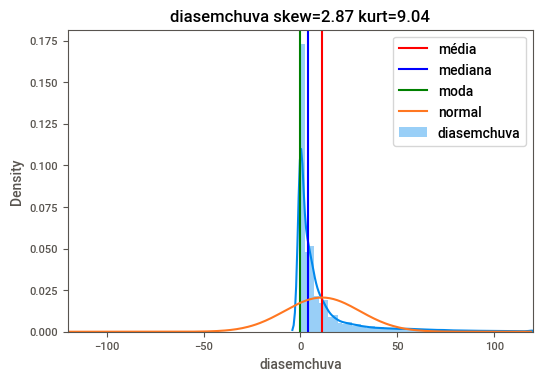

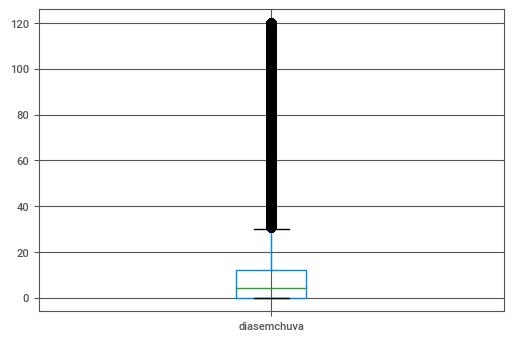

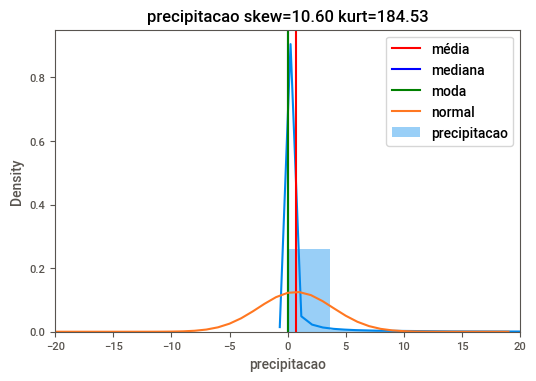

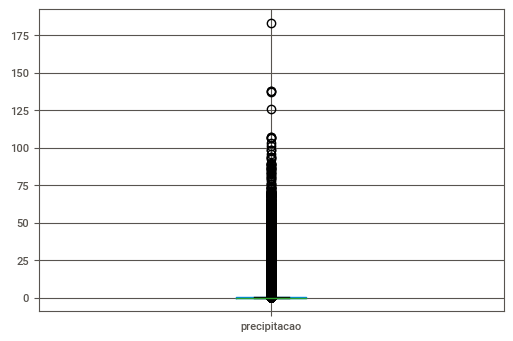

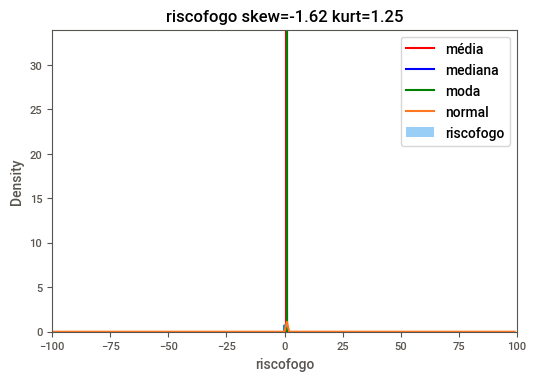

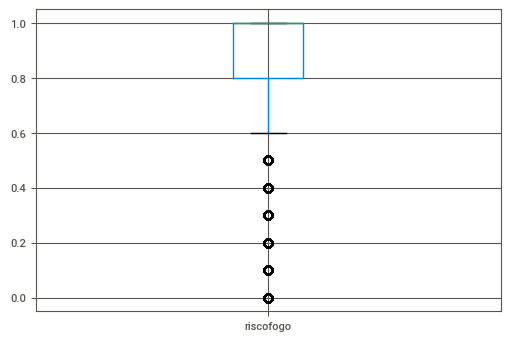

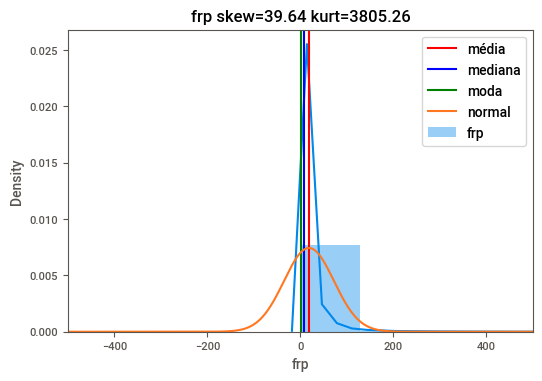

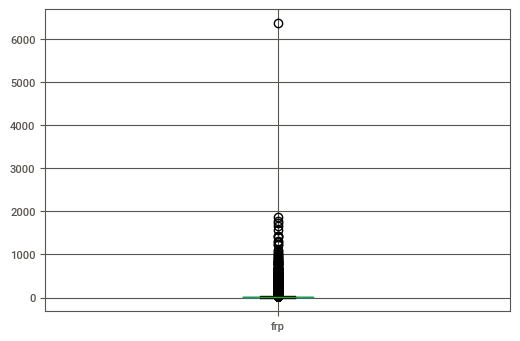

In [ ]:
# Nome das colunas : limites de cada dado
cols = {
    "diasemchuva" : [-120, 120],
    "precipitacao": [-20,20],
    "riscofogo"   : [-100,100],
    "frp"         : [-500,500],
}

for i, (colname, limits) in enumerate(cols.items()):

    plt = distplot_(df[colname], colname, limits[0], limits[1])
    plt.show()
    df.boxplot(colname)
    plt.show()

## 2.4. Distâncias e Correlações


<AxesSubplot:>

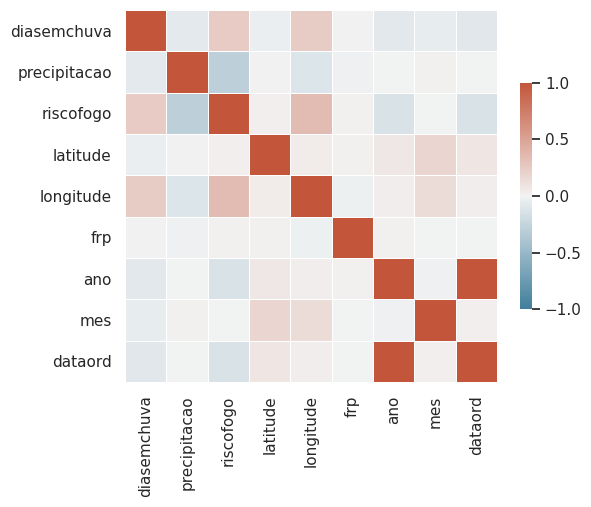

In [ ]:
# Correlação

df_corr = df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(rc={'figure.figsize':(6,6)})

sns.heatmap(df_corr, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 3. Clusterização


## 3.1. Clusterização

In [ ]:
### Tranformando tipos de dados para conservar memória
# df['diasemchuva']  = df['diasemchuva'].astype("float16")
# df['precipitacao'] = df['precipitacao'].astype("float32")
# df['riscofogo']    = df['riscofogo'].astype("float16")
# df['latitude']     = df['latitude'].astype("float32")
# df['longitude']    = df['longitude'].astype("float32")
# df['frp']          = df['frp'].astype("float16")
# df['ano']          = df['ano'].astype("int16")
# df['mes']          = df['mes'].astype("int8")
# df['dataord']      = df['dataord'].astype("int32")

In [ ]:
df.isnull().sum()

datahora              0
estado                0
bioma                81
diasemchuva      658119
precipitacao     654821
riscofogo        659212
latitude              0
longitude             0
frp             1157747
ano                   0
mes                   0
dataord               0
dtype: int64

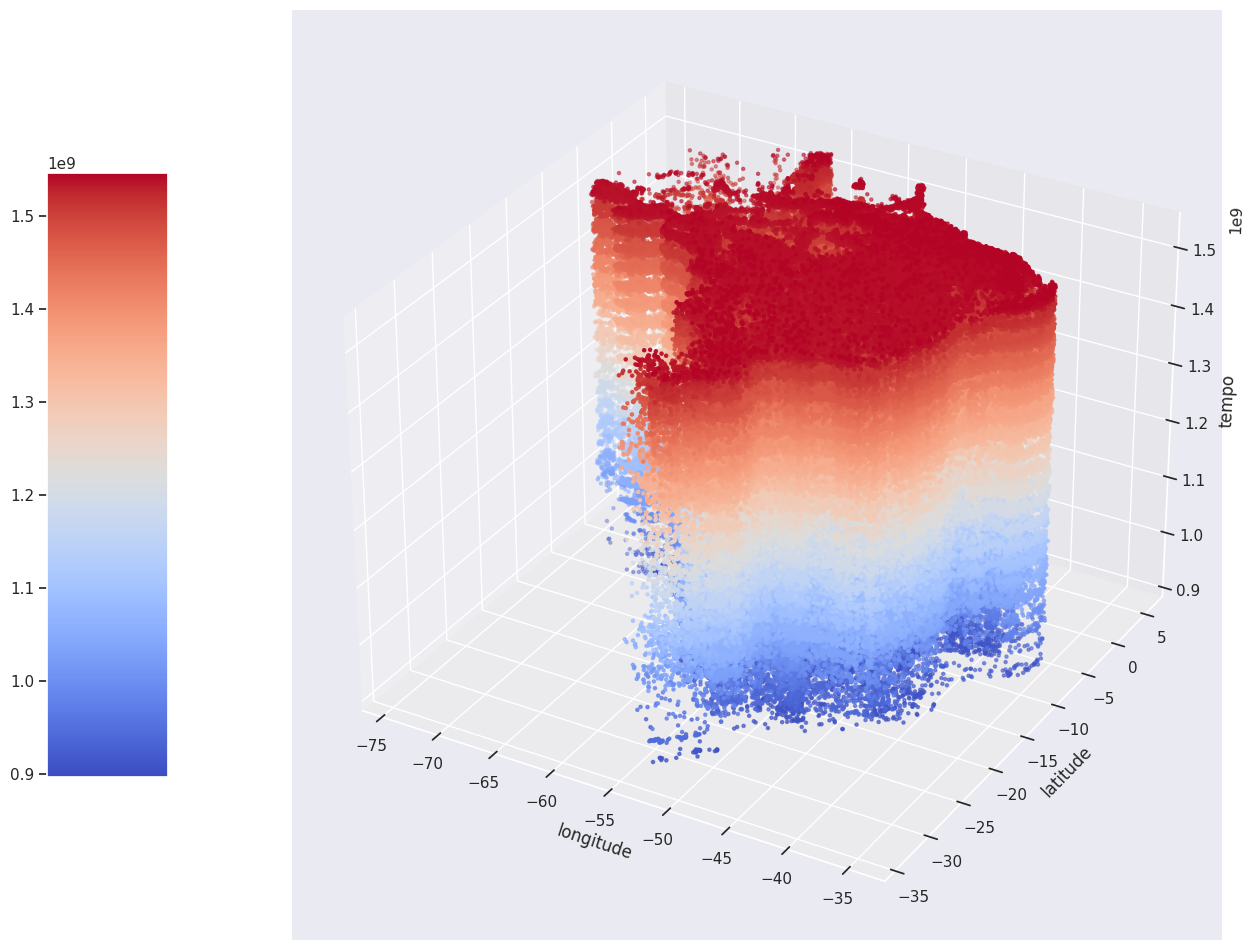

In [ ]:
# Plotando dados ao longo do tempo

from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Plotando dados
fig = plt.figure(figsize=[16,16])
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(df['longitude'], df['latitude'], df['dataord'], \
    s=5, c=df['dataord'], marker='o', cmap=cm.coolwarm)# plt.get_cmap("magma"))

#ax.set_zticklabels(df['ano'])
ax.set_zlim((df['dataord'].min(), df['dataord'].max()) )
ax.set_xlabel('longitude'); ax.set_ylabel('latitude'); ax.set_zlabel('tempo')
fig.colorbar(scatter, shrink=0.5, aspect=5, location='left')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.4, min_samples=3).fit(
    #StandardScaler().fit_transform(df[['longitude','latitude','dataord']])
    # scaler foi retirado por erros de memória
    df[['longitude','latitude','dataord']]
)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Resultados
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Number of lines: %d' % len(df.index))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Number of lines: 1212173
Estimated number of clusters: 72800
Estimated number of noise points: 529142


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
# Definindo função para cálculo dos centróides para 3 dimensões

def centroid_calculation(y_train, X_train):
    # Dicionário de centróides
    C = {}

    # Dividindo por classe
    for i in range(y_train.shape[0]):
        # Classe da instância
        clas = str(y_train[i]) 

        # Se não existe key no dicionário, criar lista vazia
        if "c"+clas not in C.keys():
            C["c"+clas] = []
        # Adicionar instância na lista correspondete à classe certa
        C["c"+clas].append( X_train[i][:3] )

    # Transformando em Arrays e calculando posições médias das classes   
    for cx in C.keys():
        array = np.array(C[cx])
        array = np.array([np.mean(array[:,0]), np.mean(array[:,1]), np.mean(array[:,2]) ])
        C[cx] = array

    # Juntando em um único array
    cm = np.vstack(tuple([array for array in C.values()]))

    return cm

centroids = centroid_calculation(labels, np.array(df[['longitude','latitude','dataord']]))
centroids.shape

(72801, 3)

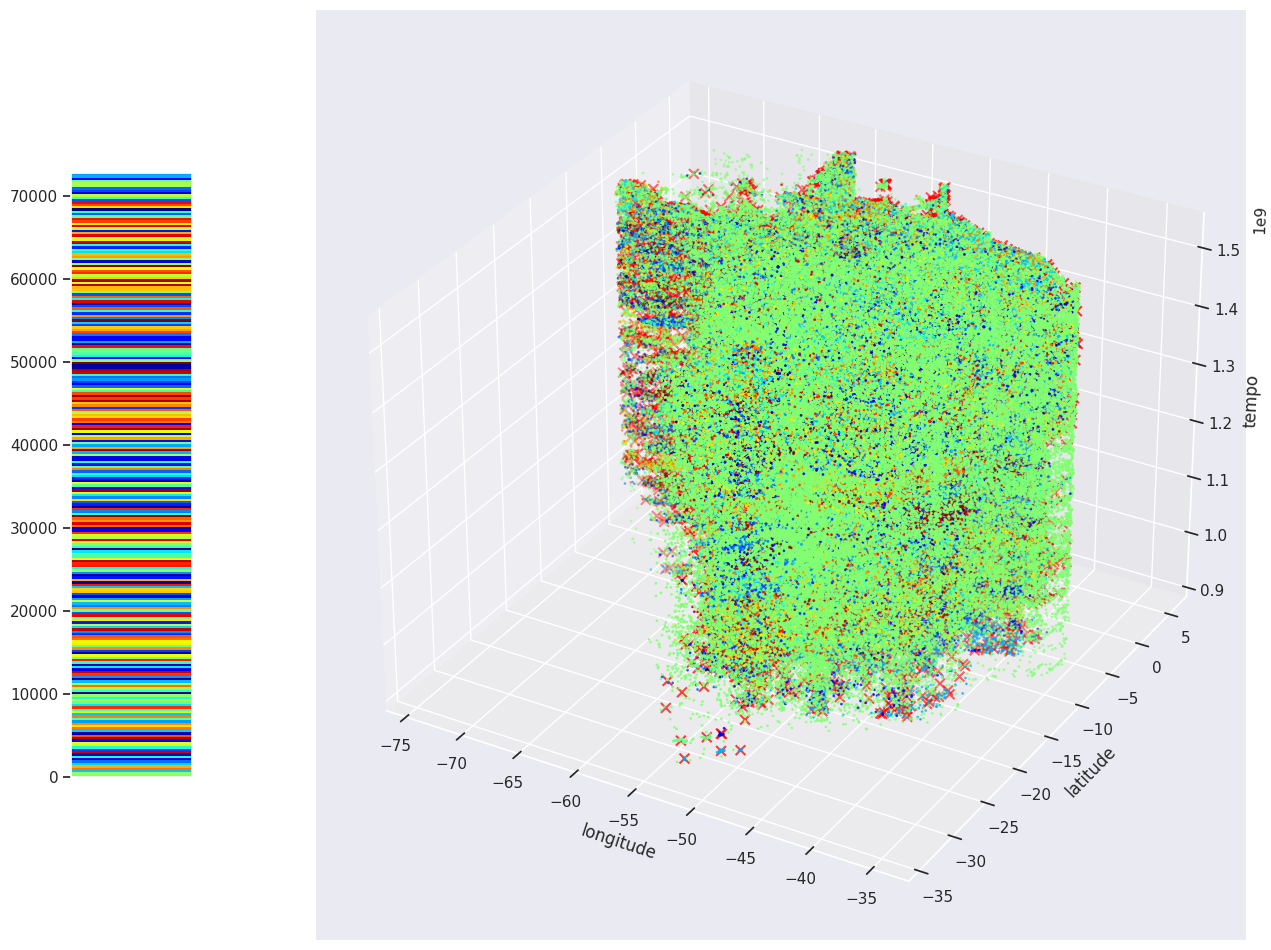

In [ ]:
# Plotando Resultados
import numpy as np
import matplotlib.pyplot as plt

# Cores aleatórias
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))

fig = plt.figure(figsize=[16,16])
ax = fig.add_subplot(projection='3d')

# Centroids
scatter = ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], \
    s=50, c='red', marker='x')
# Labels
scatter = ax.scatter(df['longitude'], df['latitude'], df['dataord'], \
    s=1, c=labels, marker='o', cmap=cmap)

#ax.set_zticklabels(df['ano'])
ax.set_zlim((df['dataord'].min(), df['dataord'].max()) )
ax.set_xlabel('longitude'); ax.set_ylabel('latitude'); ax.set_zlabel('tempo')
fig.colorbar(scatter, shrink=0.5, aspect=5, location='left')
plt.show()

# 3. Plotando em mapas

## 3.1. Número de Incêndios e Mapa de Calor

In [ ]:
# Preparando dados para plotar no mapa
df['sum'] = df['frp'].apply(lambda x : 1)
df_estado_sum  = df.groupby(['estado']).sum()
df_estado_mean = df.groupby(['estado']).mean()

df_map = pd.concat([ df_estado_mean[['latitude', 'longitude', 'diasemchuva']], df_estado_sum['sum'] ], axis=1)
df_map.head()

latitude  longitude  diasemchuva    sum
estado                                            
ACRE      -9.439027 -69.455427     3.907934  17849
ALAGOAS   -9.692056 -36.219484    24.781166   3836
AMAPA      1.249566 -51.136048     6.171525   8766
AMAZONAS  -6.395014 -62.847371     4.691121  42114
BAHIA    -12.620085 -43.256009    23.491243  67918

In [ ]:
# Configurações para Soma e Média do número de focos
print('Configurações para Soma e Média do número de focos')

# fonte:
# https://stackoverflow.com/questions/56842575/how-to-display-averages-instead-of-counts-on-folium-markerclusters

import json
import folium
from folium import Marker
from folium.plugins import MarkerCluster, HeatMap
from jinja2 import Template

# Definição de classe para customização do agrupamento
class MarkerWithProps(Marker):
    _template = Template(u"""
        {% macro script(this, kwargs) %}
        var {{this.get_name()}} = L.marker(
            [{{this.location[0]}}, {{this.location[1]}}],
            {
                icon: new L.Icon.Default(),
                {%- if this.draggable %}
                draggable: true,
                autoPan: true,
                {%- endif %}
                {%- if this.props %}
                props : {{ this.props }} 
                {%- endif %}
                }
            )
            .addTo({{this._parent.get_name()}});
        {% endmacro %}
        """)
    def __init__(self, location, popup=None, tooltip=None, icon=None,
                 draggable=False, props = None ):
        super(MarkerWithProps, self).__init__(location=location,popup=popup,tooltip=tooltip,icon=icon,draggable=draggable)
        self.props = json.loads(json.dumps(props))    

# Transformação dos dados
marker_data = tuple(
    {
        'location':[row['latitude'], row['longitude']],
        'population': row['sum'],
        'state': idx,
    }
    for idx, row in df_map.iterrows()
)

def plot_map(df, df_map, grouping='soma', clusters=True, heatmap=False):
    '''Função para plotar no mapa o número de focos agrupado por média ou soma
    
    Argumentos
    grouping: 'soma' ou 'média'
    heatmap: True ou False
    '''
    # Criando mapa
    map = folium.Map(location=[-16.1237611, -59.9219642], #centro do brasil
        tiles='cartodbpositron', zoom_start=4) 

    # Adicionando mapa de calor
    if heatmap: HeatMap(data=df[['latitude', 'longitude']], radius=15).add_to(map)

    if not clusters: 
        return map

    icon_create_function = '''
        function(cluster) {
            var markers = cluster.getAllChildMarkers();
            var sum = 0;
            for (var i = 0; i < markers.length; i++) {
                sum += markers[i].options.props.population;
            }'''+ \
            ('''var avg = sum;''' if grouping=='soma' else
             '''var avg = sum/cluster.getChildCount();
                avg = Math.round(avg * 100) / 100;''')+ \
            '''
            return L.divIcon({
                html: '<b>' + avg + '</b>',
                className: 'marker-cluster marker-cluster-small',
                iconSize: new L.Point(20, 20)
            });
        }
    '''

    # Criando clusters
    marker_cluster = MarkerCluster(icon_create_function=icon_create_function)

    # Adicionando dados nos clusters
    for marker_item in marker_data:
        marker = MarkerWithProps(
            location = marker_item['location'],
            props = { 'population': marker_item['population'] },
            tooltip = "{}: {:0.0f}".format(marker_item['state'], marker_item['population']),
        )
        marker.add_to(marker_cluster)

    # Adicionando clusters no mapa
    marker_cluster.add_to(map)

    print('Número de focos agrupado por {}'.format(grouping))
    if heatmap: print('Mapa de calor')

    return map

Configurações para Soma e Média do número de focos


In [ ]:
# Soma do número de focos

plot_map(df, df_map, grouping='soma', clusters=True, heatmap=False)

Número de focos agrupado por soma


In [ ]:
# Mapa de Calor

plot_map(df, df_map, grouping='soma', clusters=False, heatmap=True)

CellOutputSizeError: Cell output is too big.

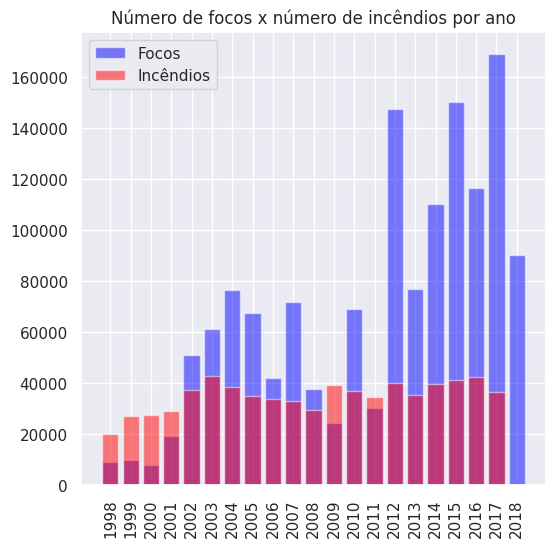

In [ ]:
#Número de focos x número de incêndios por ano

df_sum_year = df_sum.groupby(['ano']).sum()
df_sum_year.reset_index(inplace=True)

plt.bar(df_sum_year.ano,df_sum_year.focos, alpha=0.5, color='blue', label='Focos')
plt.bar(df_sum_year.ano,df_sum_year.numero, alpha=0.5, color='red', label='Incêndios')
plt.legend()
plt.title("Número de focos x número de incêndios por ano")
plt.xticks(rotation=90)
plt.xticks(df_sum_year.ano)
plt.show()

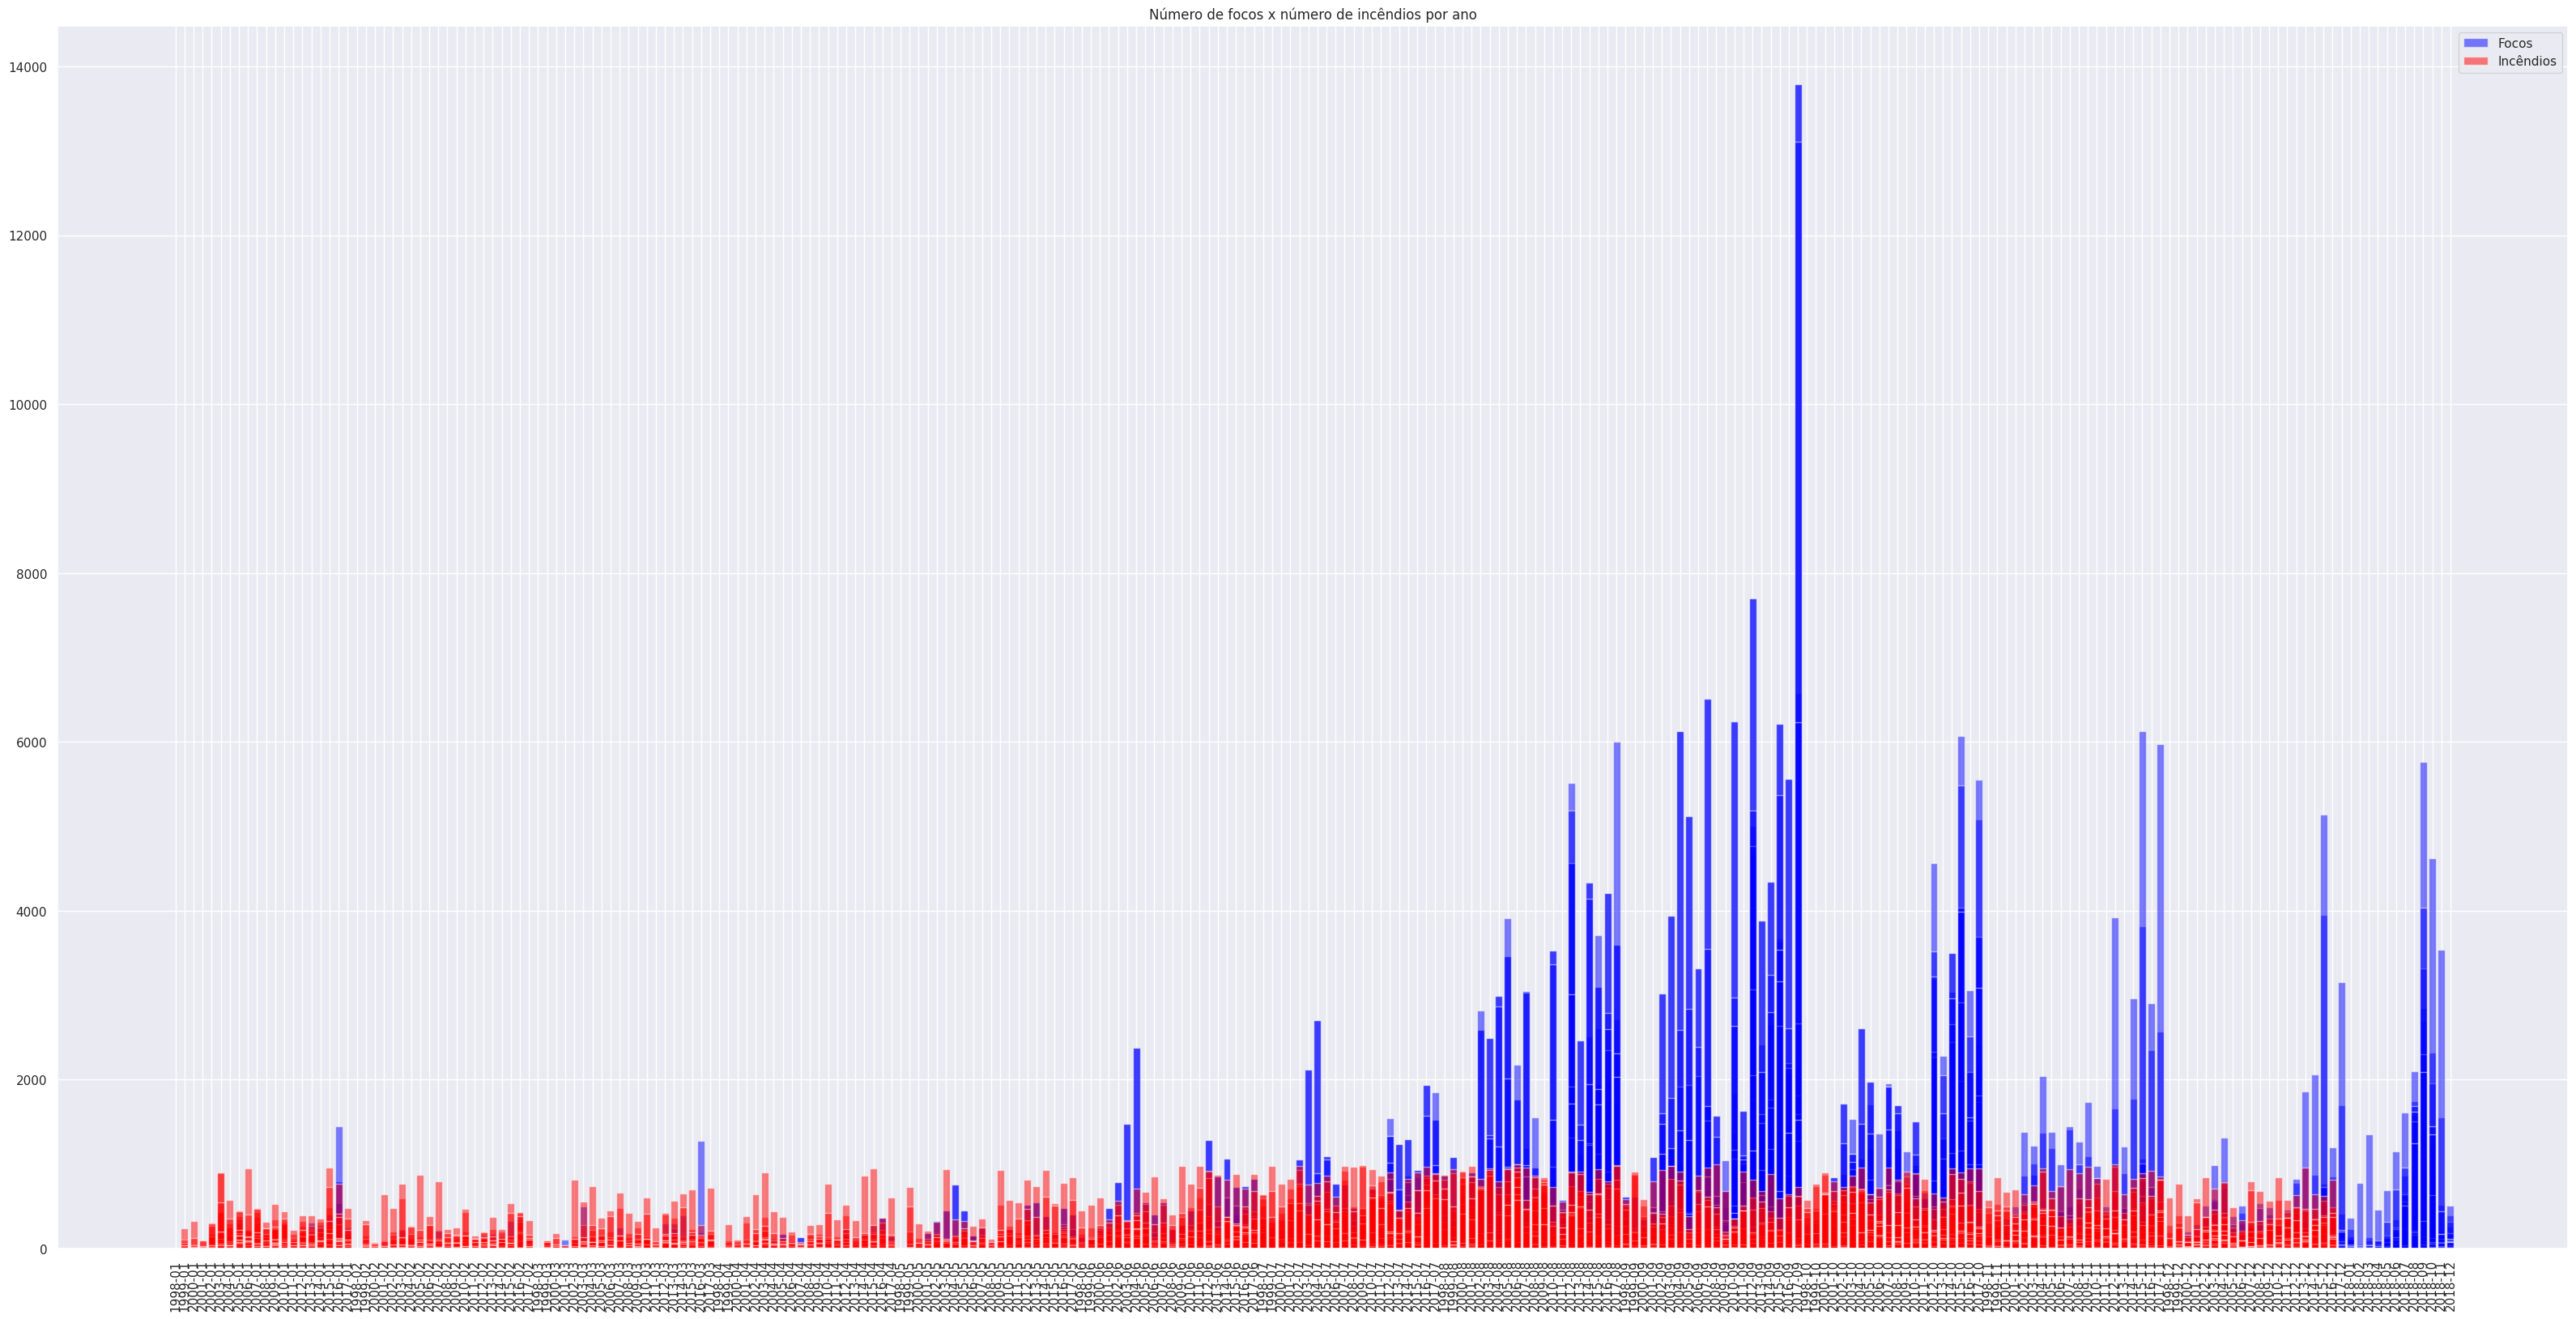

In [ ]:
#Número de focos x número de incêndios por mês

plt.figure(figsize=(40,20))
plt.bar(df_sum.data,df_sum.focos, alpha=0.5, color='blue', label='Focos')
plt.bar(df_sum.data,df_sum.numero, alpha=0.5, color='red', label='Incêndios')
plt.legend()
plt.title("Número de focos x número de incêndios por ano")
plt.xticks(rotation=90)
#plt.xticks(df_sum.data)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a04994f-e3d1-4da8-b178-1ae6ca18e20c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>